# Clustering the Countries by using Unsupervised Learning for HELP International (Kaggle dataset)

- <a href='#intro'>1. The task</a>
- <a href='#2'>2. Libraries and datasets</a>
     - <a href='#21'>2.1 Import necessary libraries</a>
     - <a href='#22'>2.2 Import data</a>
- <a href='#3'>3. Data description and basic analysis</a>
    - <a href='#31'>3.1. Features description</a> 
    - <a href='#32'>3.2. Data distribution</a>
    - <a href='#33'>3.3. Correlation</a>
- <a href='#4'>4. Data preprocessing</a>
    - <a href='#41'>4.1. Standarizing</a>
    - <a href='#42'>4.2. Dimension reduction: PCA</a> 
- <a href='#5'>5. Model: K-Means Clustering</a>
    - <a href='#51'>5.1. Choosing number of clusters</a>
        - <a href='#511'>5.1.1 Sum of squared estimate of errors (SSE)</a>
        - <a href='#512'>5.1.2 Silhouette score</a>
        - <a href='#513'>5.1.3 Davies-Bouldin Index</a>
    - <a href='#52'>5.2. Model set up</a>
- <a href='#6'>6. Cluster analysis</a>
    - <a href='#61'>6.1. Cluster plotting and visualization</a>
    - <a href='#62'>6.2. Methods comparison</a>
    - <a href='#63'>6.3. Cluster descriptions</a>
- <a href='#7'>7. Next steps after initial clustering </a>
    - <a href='#71'>7.1. Verification of countries cluster affiliation</a>   
    - <a href='#72'>7.2. Further clustering of the poorest cluster</a>
        - <a href='#721'>7.2.1 Using all features</a>
        - <a href='#722'>7.2.2 Using chosen features</a>
        - <a href='#723'>7.2.3 Using all features with partial PCA</a>
    - <a href='#73'>7.3. Listing chosen countries</a> 
- <a href='#8'>8. Final conclusions</a>


## <a id='intro'>1. The task</a>

**From Kaggle:**

HELP International have been able to raise around 10 million dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, the CEO has to make decision to choose the countries that are in the direst need of aid. 

Hence, the goal is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## <a id='2'>2. Libraries and datasets</a>

### <a id='21'>2.1. Import necessary libraries</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### <a id='22'>2.2. Import data</a>

In [2]:
# Data is stored in a standard csv file (comma as a delimiter)
# Name data with 'org' to know that this is an original state of the dataset
dataset_org = pd.read_csv('Country-data.csv')

## <a id='3'>3. Data description and basic analysis</a>

### <a id='31'>3.1. Features description</a>

**Description from Kaggle**:

- country:      Name of the country
- child_mort:   Death of children under 5 years of age per 1000 live births
- exports:      Exports of goods and services per capita. Given as % of the GDP per capita
- health:       Total health spending per capita. Given as % of GDP per capita
- imports:      Imports of goods and services per capita. Given as % of the GDP per capita
- income:       Net income per person
- inflation:    The measurement of the annual growth rate of the Total GDP
- life_expec:   The average number of years a newborn child would live if the current mortality patterns are to remain the same
- total_fer:    The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp:         The GDP per capita. Calculated as the Total GDP divided by the total population

In [3]:
# A glimpse of data
dataset_org.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Basic information on dataset**

In [4]:
# Get a concise summary of the dataframe
dataset_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Number of columns and rows in dataframe
dataset_org.shape

(167, 10)

In [6]:
# Assure that there is no missing values
dataset_org.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Check for duplicate values
len(dataset_org[dataset_org.duplicated()])

0

In [8]:
# Get standard statistical measures with an accent on border values
dataset_org.describe(percentiles = [.01, .05, .25, .5, .75, .90 ,.95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


**Conclusions:**

- dataset is small
- all values are numerical
- features' values are of different scale
- no missing or duplicate values
- there are outliers in several features
- distribution is skewed (it will be visualised later)

### <a id='32'>3.2. Data distribution</a>

In [9]:
# Getting rid of 'country' column before plotting
# 'dataset' from now on will be the dataset we will be operating on
dataset = dataset_org.drop(['country'], axis =1)

In [10]:
# Define 'histplot' function to make distribution plotting easier
def histplot(feature):
    ft = dataset[feature]
    plt.figure(figsize = (12,5))
    ax = sns.histplot(dataset[feature])
    plt.ylabel("Count")
    plt.title("{}".format(feature))
    plt.show()

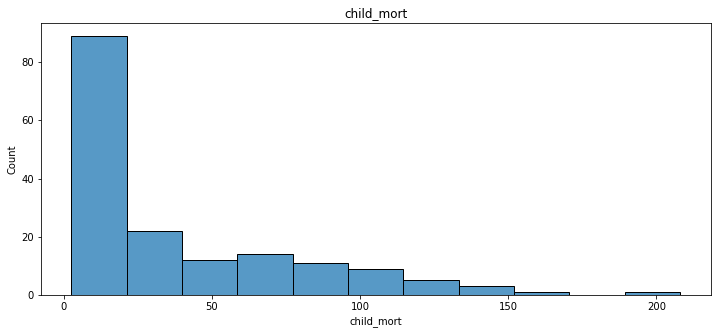

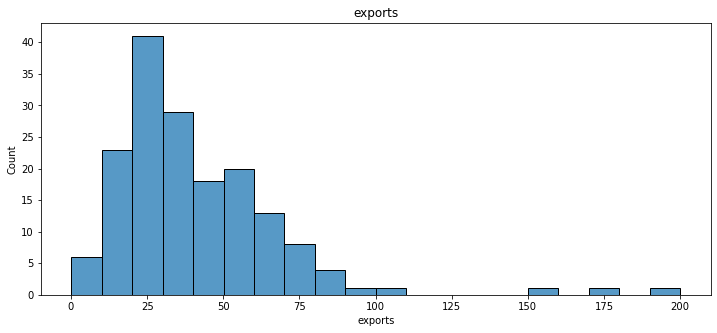

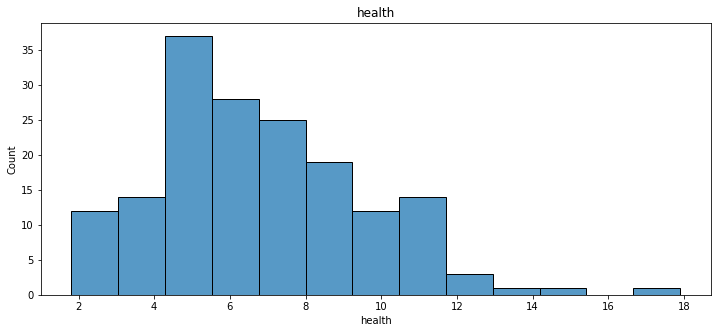

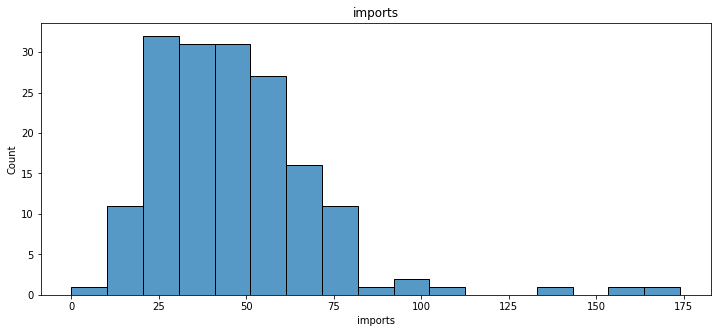

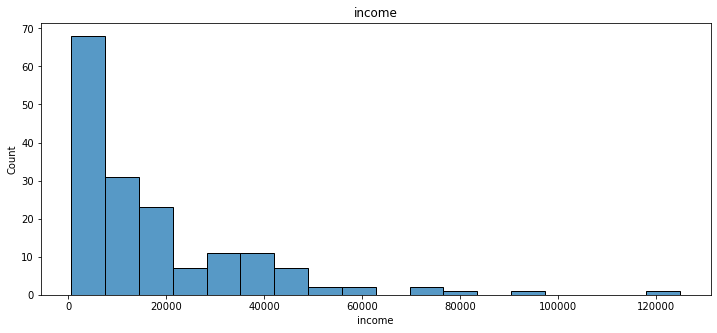

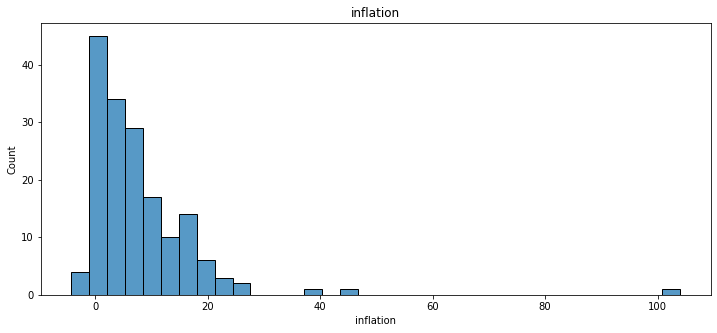

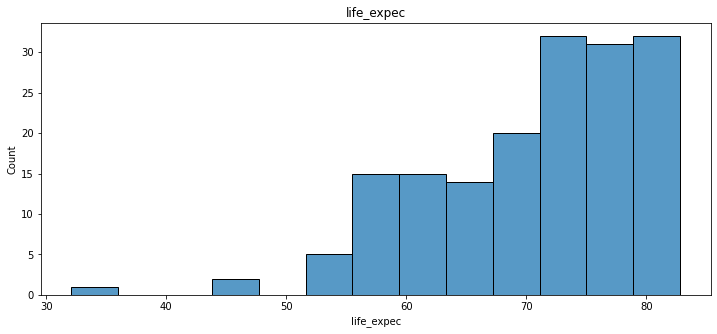

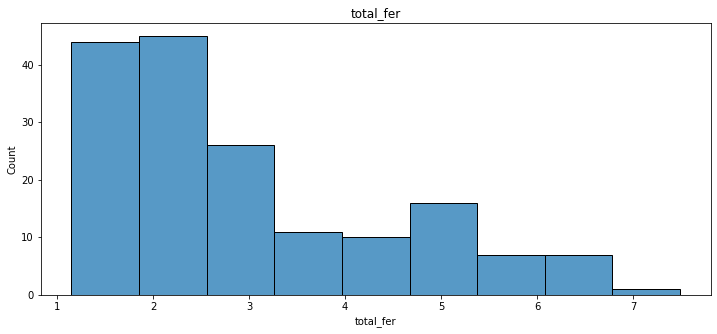

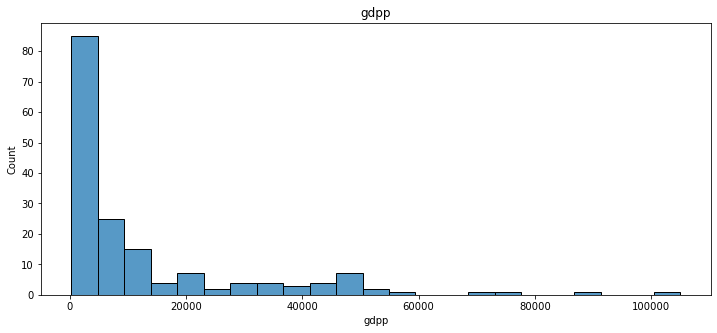

In [11]:
# Plot each feature to get a general idea of values distribution 
for feature in dataset.columns:
    histplot(feature)

Plots confirm previous conlusions concerning skewness and outliers presence.

Outliers will not be removed. In this dataset they might indicate abnormally rich or poor countries and therefore be valuable for further analysis.

### <a id='33'>3.3. Correlation</a>

One of the things worth understanding is correlation between features. It is expected to be quite high for some as they all more or less are connected with general well-being in countries (and in some cases more specifically to economy or health quality).

To observe correlation between features correlation matrix will be formed. Because nor the data distribution is normal, neither values are ordinal, Pearson and Kendall correlation coefficients should be excluded. Correlation between features will be evaluated basing on Spearman correlation coefficient.

<AxesSubplot:>

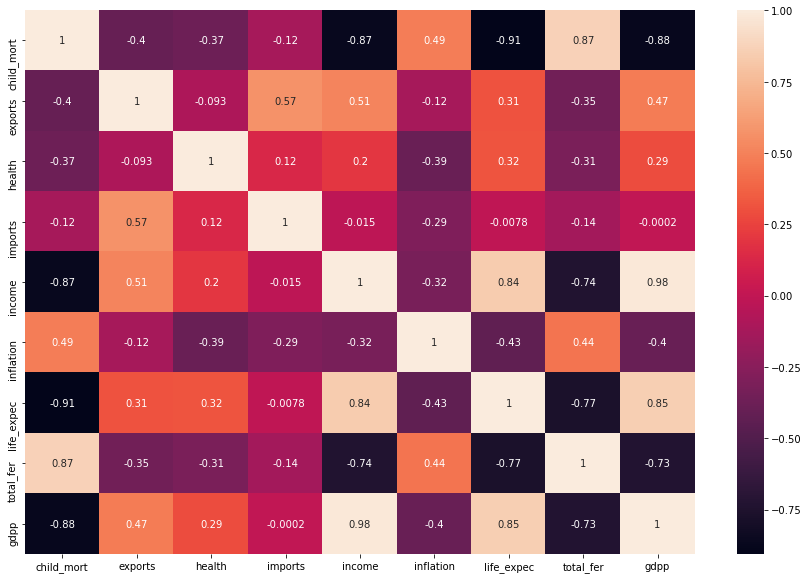

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(method='spearman', min_periods=1),annot=True)

**Conclusions** 

We assume that correlation coefficient above 0.6 means that the relationship between features is strong and above 0.8 - very strong. It can be seen that there are several such strong relationships.

- income and gdpp have extremely high correlation with each other which is obvious. They are also strongly correlated with fertility, life expectance and children mortality that are correlated between one another as well.
- exports and imports

This analysis is for data understanding only. **None of those features will be removed as K-means is not badly affected by correlations**. For dimensions reduction PCA will be used.


## <a id='4'>4. Data preprocessing</a>

**According to the task (from Kaggle) clustering should be performed using K-means algorithm.**

Now the data will be preprocessed accordingly or it will be checked how it could be modified in order to improve model perfofrmance.

### <a id='41'>4.1. Standarizing</a>

Data scaling is neccessary becacuse values of features differ in order of magnitude. K-Means (as a model utlising distances) is sensitive for this.

StandardScaler is a viable choice for this algorithm.

In [13]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

#### Put scaled data to a dataframe

In [14]:
# Creation of a new dataframe with old labels (from 'dataset') and scaled values 
df = pd.DataFrame(data= dataset_scaled , columns = dataset.columns)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


### <a id='42'>4.2. Dimension reduction: PCA</a>

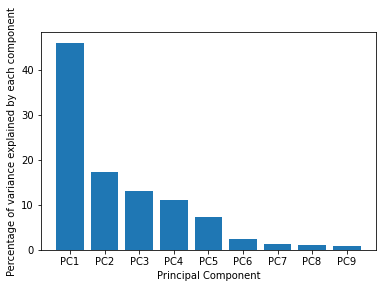

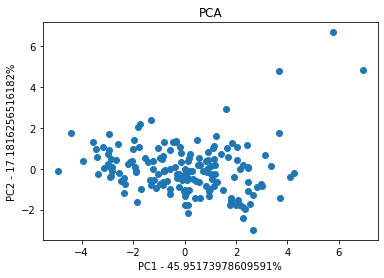

Correlation between PC1 and PC2 = -0.21976099436239402


In [15]:
from sklearn.decomposition import PCA

# Fit and transform PCA
pca = PCA()
dataset_pca = pca.fit_transform(df)

# Get percentage variation and labels for plotting in next step 
pca_var = pca.explained_variance_ratio_*100
labels = ['PC' + str(x) for x in range (1, len(pca_var)+1)]

# Plot variance for each principal component (PC)
plt.bar(labels, pca_var)
plt.ylabel('Percentage of variance explained by each component')
plt.xlabel('Principal Component')
plt.show()

# Visualize decorrelation for two first principal components
df_pca = pd.DataFrame(dataset_pca, columns = labels)
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {}%'.format(pca_var[0]))
plt.ylabel('PC2 - {}%'.format(pca_var[1]))
plt.show()

# Count correlation for the first two components
from scipy.stats import spearmanr
correlation, pvalue = spearmanr(df_pca.PC1, df_pca.PC2)
print('Correlation between PC1 and PC2 = {}'.format(correlation))

**Conclusions**

Performing PCA gives us modified dataset where 4 principal components explain about 90% of the variance of the original data. This much should be enough. 

Although 5 components explain about 95% of variance (fifth component is still quite relevant), for the sake of results readability I will stick to 4 components. 

In [16]:
# Creating new dataframe with 4 principal components
df_pca_4 = df_pca[['PC1','PC2','PC3','PC4']].copy()

## <a id='5'>5. Model: K-Means Clustering</a>

### <a id='51'>5.1. Choosing number of clusters</a>

Before running algorithm an optimal number of clusters for our case should be determined (K-Means requires number of clusters as a parameter).

For this reason for various numbers of clusters I will calculate:
- Sum of squared estimate of errors (SSE),
- Silhouette score,
- Davies-Bouldin Index.

#### <a id='511'>5.1.1 Sum of squared estimate of errors (SSE)</a>

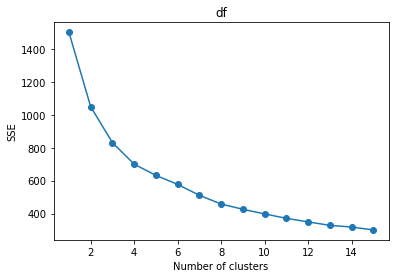

In [17]:
# Calculate SSE for numbers of clusters in a certain range using 'df' dataframe (containing scaled data)

sse = []
for i in range(1, 16):  # With 167 countries let us check up to 15 clusters in case we would want to end analysis on just 
                        # choosing 1 or 2 (small enough) 'poorest' clusters. However, with too many clusters we might end up
                        # with countries grouped not in poor-average-rich manner but because of specific unimportant factors.
    km = KMeans(
        n_clusters=i,   # Incrementing number of clusters
        random_state=0  # Keep random state same for comparability of results
    )                   # Other parameters are left with default values
    
    km.fit(df)
    sse.append(km.inertia_) # 'inertia_' attribute allows to calculate SSE quickly

# Now that SSE for a range of cluster numbers is calculated it should be plotted to facilitate using an elbow method
plt.plot(range(1, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('df')
plt.show()

**Conclusions**

If we were to use popular elbow method we would end with choosing 3, 4 or 5 clusters.

SSE calculation and visualization will be repeated for a dataframe with 4 principal components. Getting almost the same results is expected.

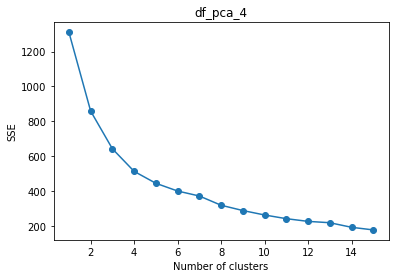

In [18]:
# Calculate SSE using df_pca_4

sse = []
for i in range(1, 16):  
    km = KMeans(
        n_clusters=i,   
        random_state=0  
    )                  
    km.fit(df_pca_4)
    sse.append(km.inertia_) 

plt.plot(range(1, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('df_pca_4')
plt.show()

As expected, results do not differ significantly.

#### <a id='512'>5.1.2 Silhouette score</a>

In [19]:
# Code based on a scikit-learn library

from sklearn.metrics import silhouette_samples

import matplotlib.cm as cm



# Define function for visualization of silhouette score to avoid repeating long code
def silhouette_plot(range_n_clusters, df):
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots() # Although there is only one plot, .subplots() is used to easen fig and ax modification
        fig.set_size_inches(9, 7)

        # The silhouette coefficient can range from -1, 1 (in this case actual range is lower and it will be not set this wide)
        ax.set_xlim([-0.3, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        km = KMeans(n_clusters=n_clusters, random_state=0) # Keep random state=0
        cluster_labels = km.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.set_title("The silhouette plot for the various clusters.")
        ax.set_xlabel("The silhouette coefficient values (red line indicates average value)")
        ax.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(("Silhouette analysis for n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2873566892140671
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.3021082505899251
For n_clusters = 5 The average silhouette_score is : 0.21958577766737195
For n_clusters = 6 The average silhouette_score is : 0.2436091452687243


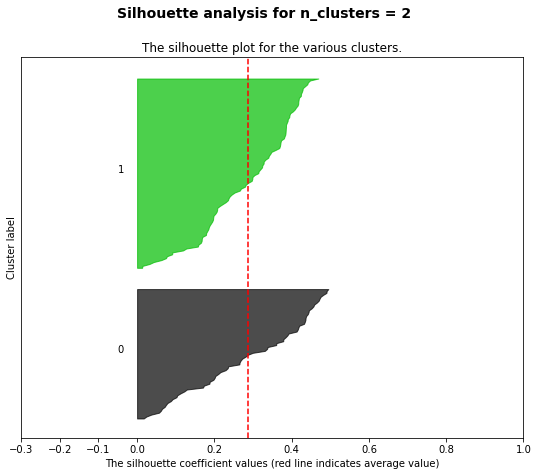

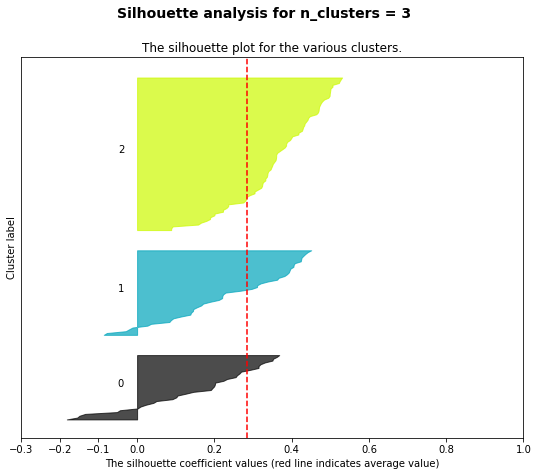

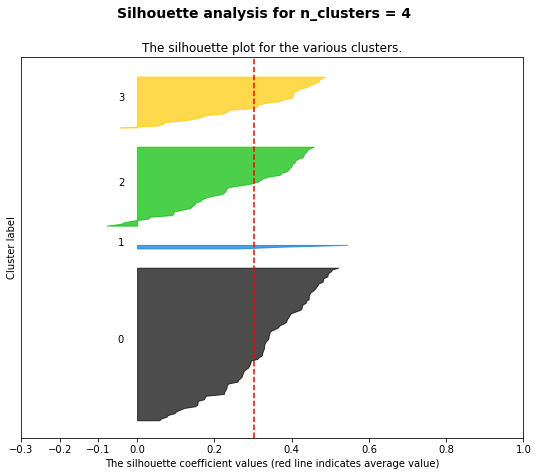

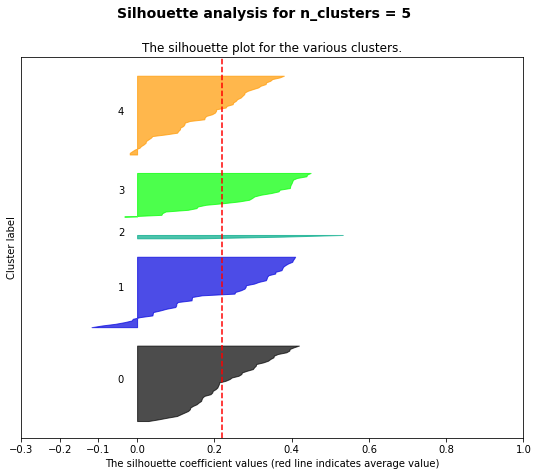

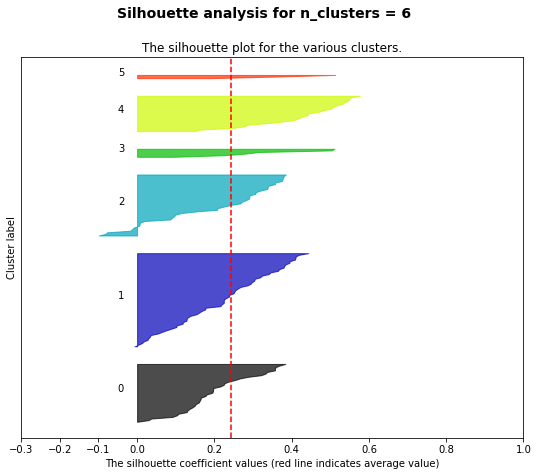

In [20]:
range_n_clusters = [2, 3, 4, 5, 6] # In order not to 'overproduce' charts let us limit to 6 clusters this time
silhouette_plot(range_n_clusters, df)

**Now let us repeat it for dataframe containing principal components (df_pca_4)**

For n_clusters = 2 The average silhouette_score is : 0.32244656378352526
For n_clusters = 3 The average silhouette_score is : 0.3340859524580049
For n_clusters = 4 The average silhouette_score is : 0.3522170843293593
For n_clusters = 5 The average silhouette_score is : 0.284162194669651
For n_clusters = 6 The average silhouette_score is : 0.29703564382244685


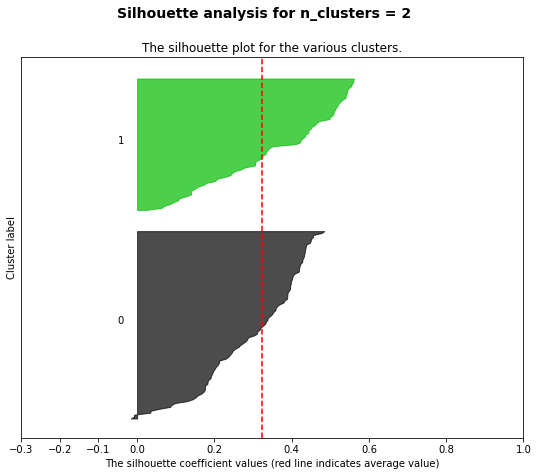

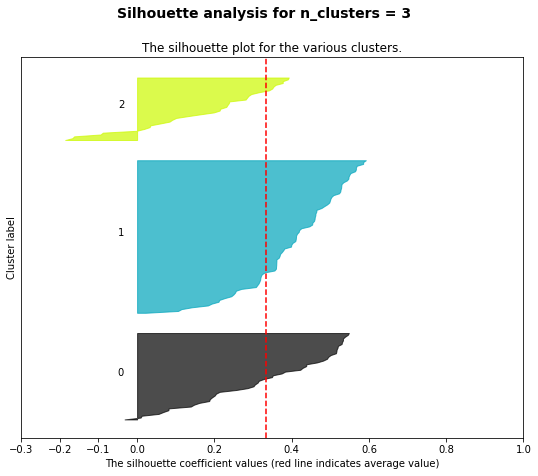

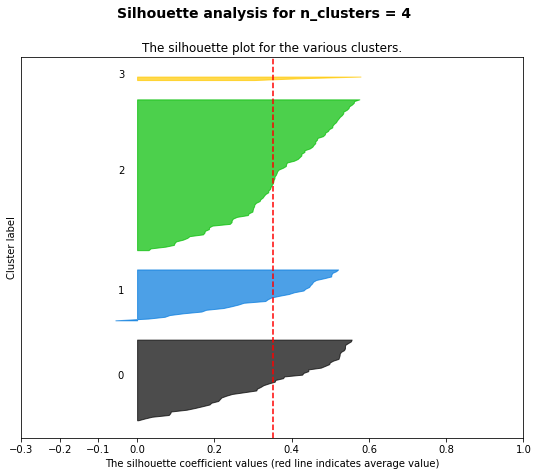

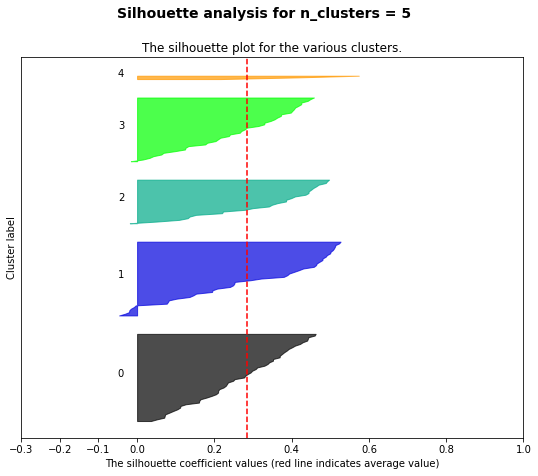

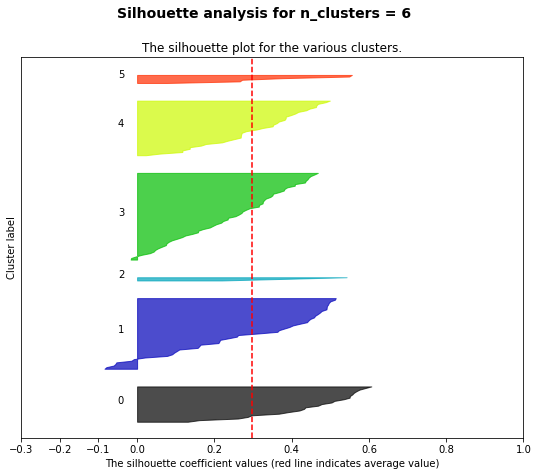

In [21]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_plot(range_n_clusters, df_pca_4)

**Conclusions**

With the optimal number of clusters:
- an average silhouette score should be as high as possible (values near 0 represent overlapping clusters with samples very close to the decision boundary of the neighboring clusters),
- in every sector the highest sample value should be higher than an average score.

Keeping the above in mind, basing on silhouette we should choose:
- between 2, 3 or 4 clusters for analysis with standarized values,
- 4 clusters (results for 4 seems better than for 3 or 2) for data after PCA.

#### <a id='513'>5.1.3 Davies-Bouldin Index</a>

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering. High score for a pair of clusters indicates that it might be better to join them to one cluster (samples are relatively far from their centroids and centroids are close to one another).

In [22]:
from sklearn.metrics import davies_bouldin_score

# Get Davies-Bouldin score for dataframe with standarized data
DBS_results = []
for n_clusters in range(2,11): # This time visualization is easier so let us see results for more divisions
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(df) # Keep random state=0
    labels = km.labels_
    DBS_results.append(davies_bouldin_score(df, labels))    

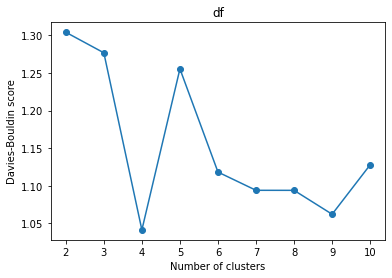

In [23]:
plt.plot(range(2, 11), DBS_results, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('df')
plt.show()

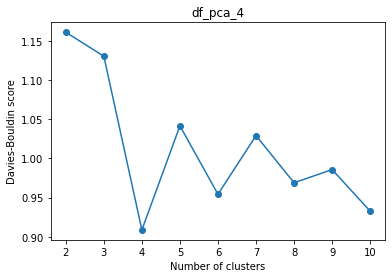

In [24]:
# Get Davies-Bouldin score for dataframe with principal components
DBS_results = []
for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca_4)
    labels = km.labels_
    DBS_results.append(davies_bouldin_score(df_pca_4, labels))   
    
plt.plot(range(2, 11), DBS_results, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('df_pca_4')
plt.show()

**Conclusions**

For both dataframes we can clearly see that DB score is best for 4 clusters.

What is more, DB score is better for a dataframe with principal components (for 4 clusters by ~0.15).

**GENERAL CONCLUSIONS**

After using three evaluation methods choosing 4 as number of clusters for our case seems to be the best idea:
- SSE and Silhouette analysis gives us range of best choices,
- Davis-Bouldin score is best for 4 clusters.

It has to be kept in mind though, that (looking at plots for Silhouette analysis) the 4th cluster is relatively small and might contain countries with quite specific features.


After completing clustering, further analysis will have to be performed in order to verify if clusters are formed in a desirable way (actually indicating countries in a greatest need of receving aid).



### <a id='52'>5.2. Model set up</a>

In [25]:
km = KMeans (
    n_clusters = 4, # number of clusters/centroids to create
    init = 'k-means++', # Default
    n_init = 20, # Twice the default value. There is not much counting to perform so we can afford more 'starts'
    max_iter = 500, # Default is 300. Let us raise it for the same reason as mentioned above
    tol = 1e-4, # Default value
    random_state = 50 # Random but precised value to make results comparable (and repeatable to make working on a notebook easier)
)

In [26]:
# Store labels for two dataframes
labels_standarized = km.fit_predict(df)
labels_pca = km.fit_predict(df_pca_4)

In [27]:
# Add the cluster column to the dataframes for visualization
df['cluster'] = labels_standarized
df_pca_4['cluster'] = labels_pca

In [28]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


In [29]:
df_pca_4.head()

,PC1,PC2,PC3,PC4,cluster
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,3
2,-0.285225,-0.455174,1.221505,-0.868115,3
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,3


## <a id='6'>6. Cluster analysis</a>

### <a id='61'>6.1. Cluster plotting and visualization</a>

**Visualise clusters by feature (standarized data first)**

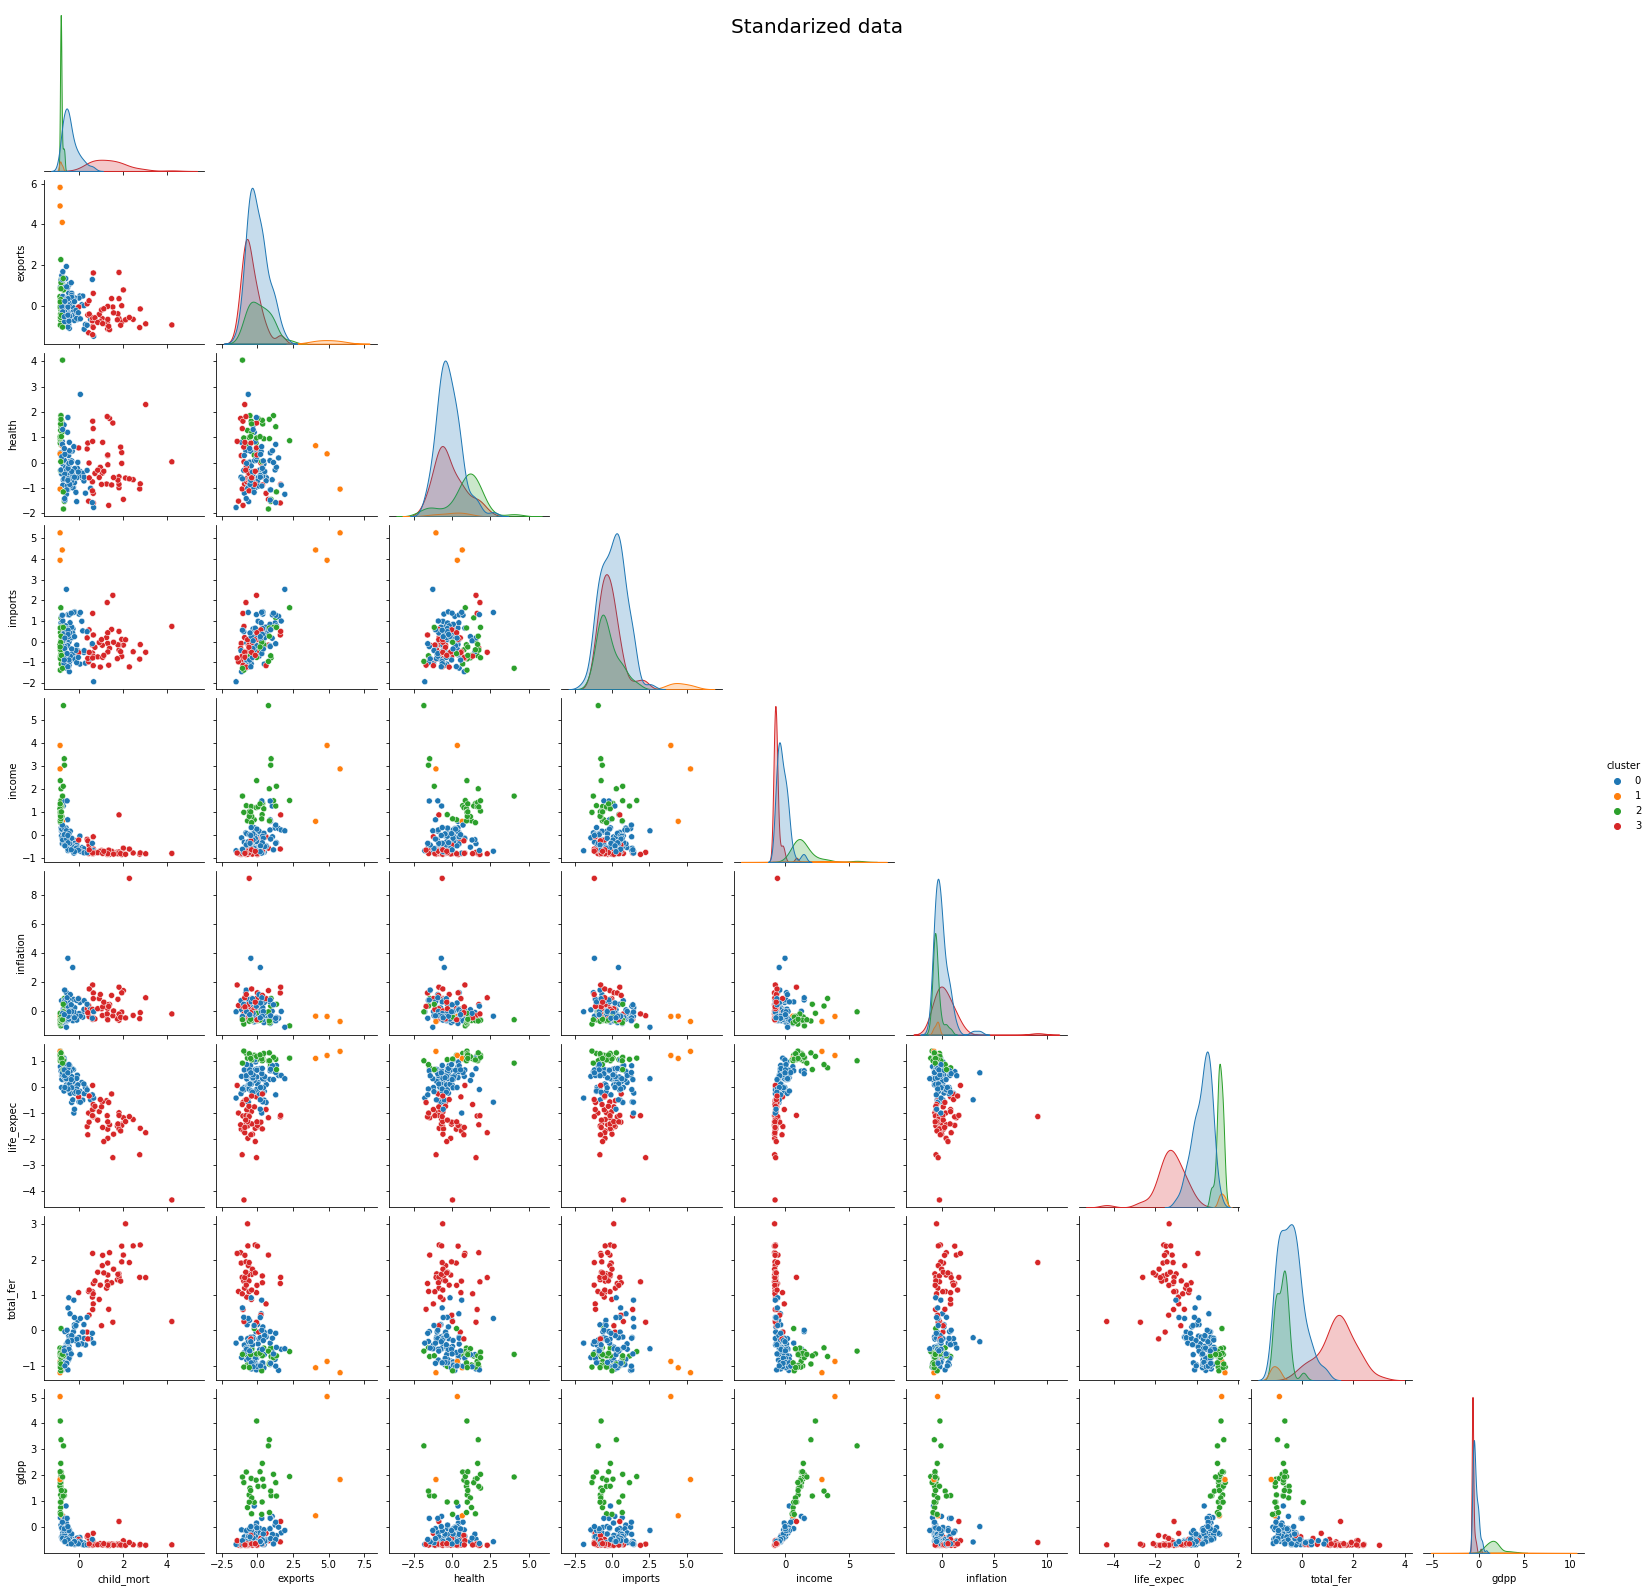

In [30]:
sns.pairplot(df, 
             hue="cluster",
             palette="tab10",
             corner=True)

# title
plt.suptitle('Standarized data', 
             size = 20);

**Conlusions - standarized data**

Looking at standarized data we can draw following conclusions:
- overlapping is visible mostly for features that could be predicted to be less important for this clustering: imports, exports, inflation,
- looking at economic features (income, gdpp) cluster 2 (the smallest one) cotains only the richest countries (they seemingly might be considered as outliers),
- 3 remaining clusters are divided more or less into poor, average and rich countries,
- <u>for features that presumably are the most important for our analysis (children mortality and gdpp) the division is quite clear</u>

Text(0.5, 0.98, 'principal components')

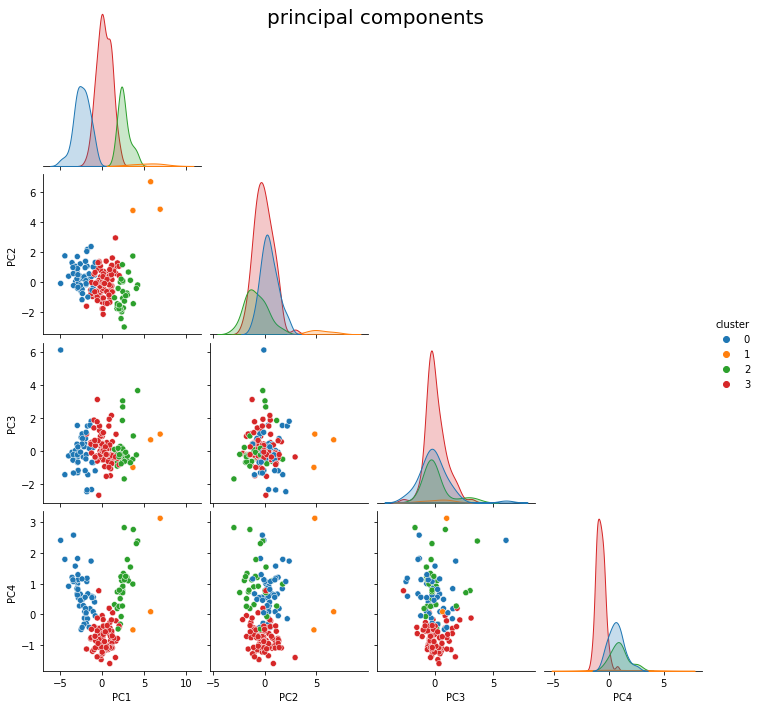

In [31]:
sns.pairplot(df_pca_4, 
             hue="cluster",
             palette="tab10",
             corner=True)

# title
plt.suptitle('principal components', 
             size = 20)

There is not much to deduce from df_pca_4 plots (because of a problem with principal components interpretability). Let us attach labels fit on PC dataframe to the dataframe containing standarized data to see division with meaningful features.


For now it can be easily seen that clusters are best divided for first principal components (PC1, PC2). It was expected as these components explain vast majority of variance.

In [32]:
df_pca_4_features = df.copy()
df_pca_4_features['cluster'] = labels_pca

Text(0.5, 0.98, 'principal components')

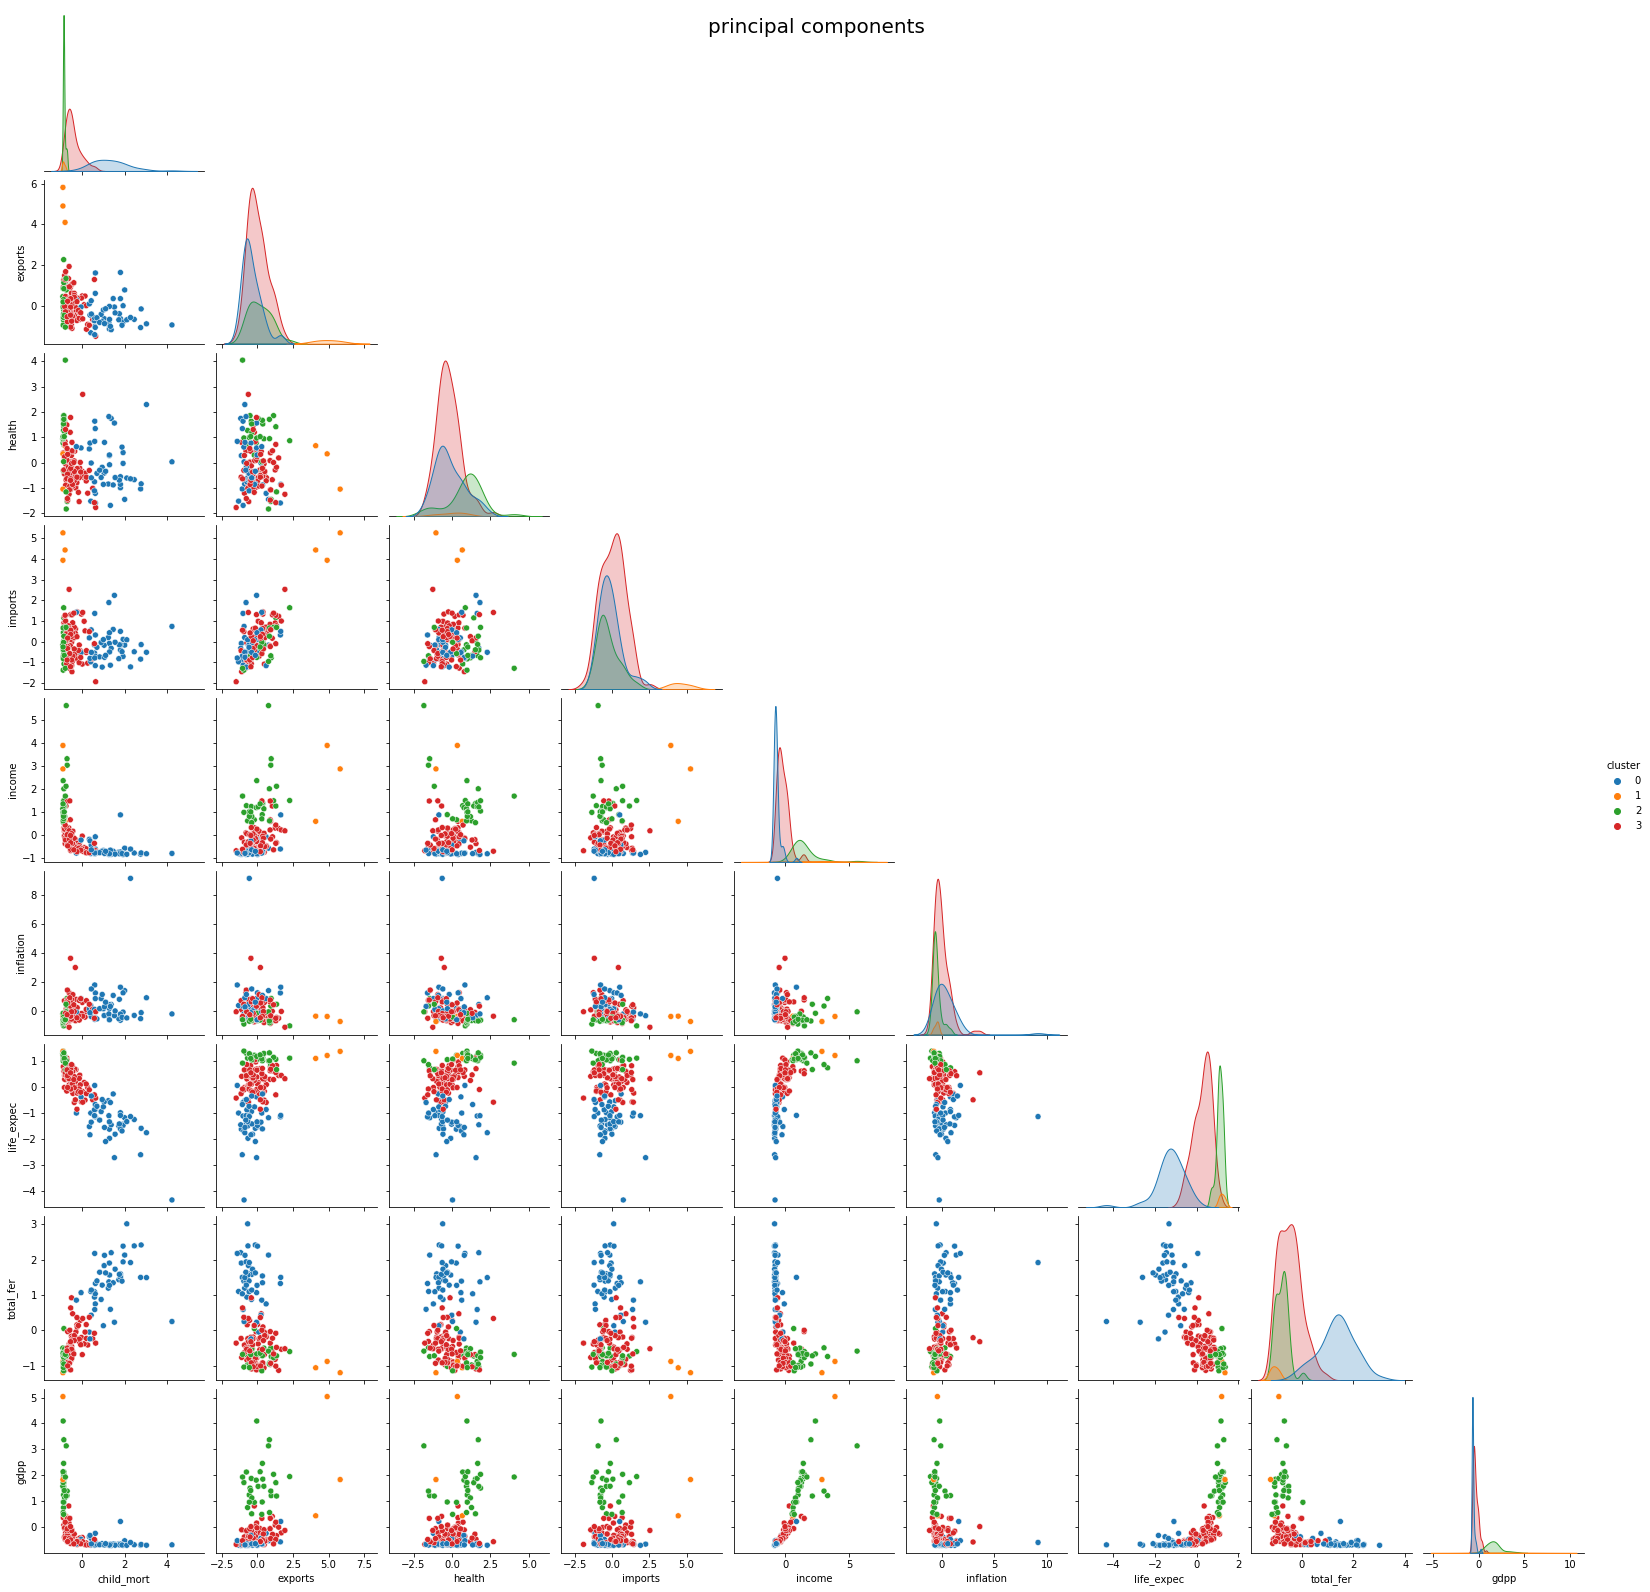

In [33]:
sns.pairplot(df_pca_4_features, 
             hue="cluster",
             palette="tab10",
            corner=True)

# title
plt.suptitle('principal components', 
             size = 20)

**Conlusions - principal components**

The results are virtually the same (or even exactly the same) as for stadarized data only analysis.

### <a id='62'>6.2. Methods comparison</a>

As seen above results are very similar between standarized data and principal components we got after performing PCA.

Now i will try determine how (or if) the results differ.

In [34]:
pd.pivot_table(df, index=['cluster'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,-0.419827,0.006648,-0.330805,-0.211724,0.047581,-0.217274,-0.034953,0.268420,-0.438222
1,-0.849003,4.935673,2.440797,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863
2,-0.828609,0.172621,1.661902,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681
3,1.360218,-0.437533,-0.604242,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944


In [35]:
pd.pivot_table(df_pca_4_features, index=['cluster'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,1.326610,-0.422174,-0.604963,-0.139541,-0.155648,-0.689238,0.391812,-1.276276,1.354342
1,-0.849003,4.935673,2.440797,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863
2,-0.828609,0.172621,1.661902,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681
3,-0.421768,0.003241,-0.327223,-0.221549,0.031606,-0.210505,-0.034287,0.283154,-0.453272


Clusters numeration does not matter - it differs for both methods. We can tell which cluster is which judging by mean values for them. With only 4 of them we are able to tell which one (from df) corresponds to which one (from df_pca_4_features): 0-3, 1-1, 2-2, 3-0.

We can see that only two 'pairs' of clusters differ slightly in calculated mean values (0-3 and 3-0). Let us check how many countries was put into each cluster.

In [36]:
df.cluster.value_counts()

0    87
3    47
2    30
1     3
Name: cluster, dtype: int64

In [37]:
df_pca_4_features.cluster.value_counts()

3    86
0    48
2    30
1     3
Name: cluster, dtype: int64

So now it is obvious that just one country (theorically it could be more but it is highly unlikely) was assigned to a different cluster (comparing using principal components istead of just standarized data and all features).

Let us confirm it in a different way.

In [38]:
# Add cluster labels acquired in two different methods (thus '_standarized' and '_pca') to original dataset
dataset_standarized = dataset_org.copy()
dataset_pca = dataset_org.copy()
dataset_standarized['cluster'] = labels_standarized
dataset_pca['cluster'] = labels_pca

In [39]:
# Average countries
print('Countries in cluster 0_standarized but not in according cluster in PCA: '+
      str(set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 0].country))-
      set(list(dataset_pca.loc[dataset_pca['cluster'] == 3].country))))
print('Countries in cluster 3_PCA but not in according cluster in standarized: '+
      str(set(list(dataset_pca.loc[dataset_pca['cluster'] == 3].country))-
      set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 0].country))))

Countries in cluster 0_standarized but not in according cluster in PCA: {'Solomon Islands'}
Countries in cluster 3_PCA but not in according cluster in standarized: set()


Printing 'set()' means that there is no such elements

In [40]:
# Three richest countries
print('Countries in cluster 1_standarized but not in according cluster in PCA: '+
      str(set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 1].country))-
      set(list(dataset_pca.loc[dataset_pca['cluster'] == 1].country))))
print('Countries in cluster 1_PCA but not in according cluster in standarized: '+
      str(set(list(dataset_pca.loc[dataset_pca['cluster'] == 1].country))-
      set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 1].country))))

Countries in cluster 1_standarized but not in according cluster in PCA: set()
Countries in cluster 1_PCA but not in according cluster in standarized: set()


In [41]:
# Rich countries
print('Countries in cluster 2_standarized but not in according cluster in PCA: '+
      str(set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 2].country))-
      set(list(dataset_pca.loc[dataset_pca['cluster'] == 2].country))))
print('Countries in cluster 2_PCA but not in according cluster in standarized: '+
      str(set(list(dataset_pca.loc[dataset_pca['cluster'] == 2].country))-
      set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 2].country))))

Countries in cluster 2_standarized but not in according cluster in PCA: set()
Countries in cluster 2_PCA but not in according cluster in standarized: set()


In [42]:
# Poor countries
print('Countries in cluster 3_standarized but not in according cluster in PCA: '+
      str(set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 3].country))-
      set(list(dataset_pca.loc[dataset_pca['cluster'] == 0].country))))
print('Countries in cluster 0_PCA but not in according cluster in standarized: '+
      str(set(list(dataset_pca.loc[dataset_pca['cluster'] == 0].country))-
      set(list(dataset_standarized.loc[dataset_standarized['cluster'] == 3].country))))

Countries in cluster 3_standarized but not in according cluster in PCA: set()
Countries in cluster 0_PCA but not in according cluster in standarized: {'Solomon Islands'}


In [43]:
# Look at the features values for a country assigned to different cluster: Solomon Islands
dataset_standarized.loc[(dataset_standarized['country']=='Solomon Islands')]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290,0


As we compare children mortality of Solomon Islands with the description of the data we performed in section 3.1 we can see that it is much below value for 75% percentile. Therefore we can ignore iclude it in 'the lowest' cluster.

**Conclusions**

As we can see, difference between clusters is marginal. From now on I will cease to compare results from two dataframes and concentrate on original one.


### <a id='63'>6.3. Cluster descriptions</a>

I have already made a general evaluation of clusters basing on standarized data but let us see what are actual mean values for clusters (calculated from original, unscaled data).

Apart from that we will check how particular countries were assigned to each cluster.

In [44]:
# For clarity let us change cluster labels
dataset_standarized['cluster'].loc[dataset_standarized['cluster']==1] = 4 # The richest countries get the highest number (4)
dataset_standarized['cluster'].loc[dataset_standarized['cluster']==3] = 1 # Poor countries get the lowest number (1)
dataset_standarized['cluster'].loc[dataset_standarized['cluster']==2] = 3 # Rich countries get label '3'
dataset_standarized['cluster'].loc[dataset_standarized['cluster']==0] = 2 # Average countries get a number between 2 and 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [45]:
# Create a table similar to previous ones but filled with original unscaled data
pd.pivot_table(dataset_standarized, index=['cluster'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
1,92.961702,29.151277,1922.382979,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085
2,21.389655,41.290678,6919.103448,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552
3,4.953333,45.826667,43333.333333,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333
4,4.133333,176.000000,57566.666667,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000


The division is as stated in a previous section:
- poor countries are grouped in cluster 1 - lowest economical characteristics and life expectancy, high children mortality
- average countries are grouped in cluster 2 - average economical characteristics and life expectancy, average children mortality 
- rich countries are grouped in cluster 3 - high economical and life expectancy, low children mortality
- the richest countries (outliers) are grouped in cluster 4 - highest economical and life expectancy,  low children mortality

We can see that poorest countries have the highest fertility. Moreover, health spendings do not correspond with life expectancy or children mortility - this is probably because health spendings are given as a percentage of GDP per capita which gives lower amount for poor countries even with equal percentage values.

We will most probably concentrate on poorest coountries but let us a take a look at all clusters.

In [46]:
# Poor countries - cluster 1 
print(list(dataset_standarized.loc[dataset_standarized['cluster'] == 1].country))

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [47]:
# Average countries - cluster 2
print(list(dataset_standarized.loc[dataset_standarized['cluster'] == 2].country))

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisi

In [48]:
# Rich countries - cluster 3
print(list(dataset_standarized.loc[dataset_standarized['cluster'] == 3].country))

['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']


In [49]:
# The richest countries - cluster 4
print(list(dataset_standarized.loc[dataset_standarized['cluster'] == 4].country))

['Luxembourg', 'Malta', 'Singapore']


Three richest countries fit in 'outliers' descripiton. These are relatively small and rich countries where the general level of life is very high. 

## <a id='7'>7. Next steps after initial clustering </a>

**Summary of previous steps**

- In previous steps clustering of countries was performed. 
- Due to the nature of features we were given in the dataset, affiliation to a certain cluster indicates a general well-being of a country. 
- The division we got is more or less for poor, average, rich and the richest countries (conclusion from data visualization and mean features values for each cluster).

**Summary of the task and assumptions**

This is a good place to recall with what and what we are working on.

<i>The goal</i> is to choose a group of countries to be aided from HELP International funds. The requirements for this group are not clearly specified so this gives us a lot of freedom on how to approach this task. It will be discussed in a moment.

<i>The assumptions</i> for completing the task are:
- Coutries to receive aid <u>must be chosen using K-means algorithm</u>
- <u>We are not supposed to add any new data</u> even if it is public (there is plenty of data we could adopt for this research so let us assume that HELP International wanted only the data we were given to be the factor). Therefore, any features changes we are allowed to make are basing on existing ones (dimensionality reduction, feature engineering, feature extraction) 

What to do now depends on expectations of HELP International and on a nature of the task we were given. As it was noticed, specific expectations of HELP International were not explained in the task. If the organization expects us give a general direction how the funds might be distributed we could even finish the project now, having chosen less than 50 countries with the worst ratings for aspects (features) chosen by HELP International.

However, it seems inappropriate to leave the group of chosen countries so numerous. It would lead to too big fragmentation of funds and in a group so big we can expect certain countries to be in a much greater need for aid than others. <u>Therefore further clustering attempts with different approches will be made.</u>

**Next steps**

In accordance with aforementioned assumptions the following steps will be taken:
1. Verification if other countries should be involved in the 'poor' cluster if particular features were to be treated as decisive.
2. Further clustering of the 'poor' cluster:
- using all features (just as before) - to see if smaller, more adequate clusters emerge,
- using chosen features - assuming that there are features more important than others and limiting features input to them while clustering,
- (experimental one) using all features, but chosen ones in unmodified state and 'compressing' others using PCA - assuming that there are more and less important features but the latter should not be ignored completely


### <a id='71'>7.1. Verification of countries cluster affiliation</a>

Countries were clustered using all features we were given. In this situation it is hard to check if any of them should belong to other clusters as all features are treated equally.

<u>For the needs of further research let us choose from among given features describing general socio-economic condition of the country several that will be crucial for aid approval</u>. These crucial features are:
 - <b>children mortality</b> - this seems to be the most important value to limit. Whereas life length expectancy might be influenced by all sorts of factors (meaning hard to be managed), children mortality  might be lowered by relatively simple and easier to organize actions (e.g. providing suitable nutrition or basic vaccines),
 - <b>net income per person</b> - in the given dataset there are several features describing countries' ecomomic condition. From among them I decided to choose net income per person. I consider it to be more influential than gdpp (more important for the whole country economy, less for households' ability to provide everyday needs), exports, imports (important for economy, not for poorest citizens).
 
I decided not to include health spendings as they (being percentage value) are hard to evaluate without taking country budget into consideration.

To begin with, let us plot these values for countries from two poorest clusters (we saw this plotted for all clusters previously - now we would see it more clearly).

In [50]:
# Rename labels as performed for dataframe with unscaled data
df.cluster=dataset_standarized.cluster

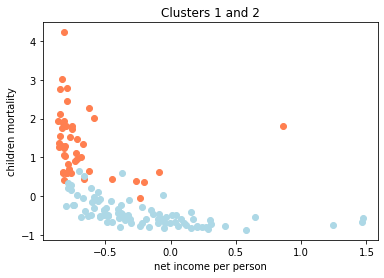

In [51]:
# Standard scatterplot
plt.scatter(df.loc[df['cluster']==1, ['income']], df.loc[df['cluster']==1, ['child_mort']], c='coral')
plt.scatter(df.loc[df['cluster']==2, ['income']], df.loc[df['cluster']==2, ['child_mort']], c='lightblue')
plt.title('Clusters 1 and 2')
plt.xlabel('net income per person')
plt.ylabel('children mortality')
plt.show()

**Conclusions**

We can see that there are about 5 countries that could be assigned to a different cluster (taking children mortality as the most important factor). Because we want to narrow the poorest cluster by at least half (about 20 countries) <u>we can ignore this overlapping. Therefore, no country will be reassigned.</u>

### <a id='72'>7.2. Further clustering of the poorest cluster</a>

As decided previously, further clustering will now be performed.

In [52]:
# Create dataframes with cluster number 1 only and drop 'cluster' column
df_poor = df.loc[df['cluster']==1].copy()
df_poor.drop(['cluster'], axis=1, inplace=True)
dataset_poor = dataset_standarized.loc[dataset_standarized['cluster']==1].copy()
dataset_poor.drop(['cluster'], axis=1, inplace=True)

Clusterings will be preceded by analyses analogical do these performed before the first clustering.

#### <a id='721'>7.2.1 Using all features</a>

In this step we will use all features that HELP International gave us. This will be the last try to treat all features equally. We will hope that countries will not be clustered according to irrelevant patterns in the data ('irrelevant' meaning not grading them from the poorest to the richest).

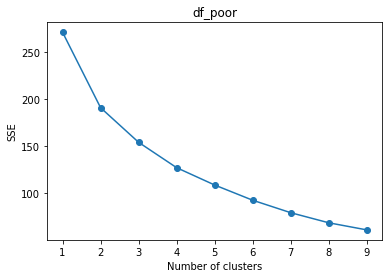

In [53]:
# Calculate SSE for numbers of clusters

sse = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i,   
        random_state=0  
    )                   
    
    km.fit(df_poor)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('df_poor')
plt.show()

It is hard to see any 'elbow' here. Let us get to other analyses.

For n_clusters = 2 The average silhouette_score is : 0.6892503998510126
For n_clusters = 3 The average silhouette_score is : 0.15850239331515845
For n_clusters = 4 The average silhouette_score is : 0.1800431744190111
For n_clusters = 5 The average silhouette_score is : 0.19392418518849572
For n_clusters = 6 The average silhouette_score is : 0.1945024903106691
For n_clusters = 7 The average silhouette_score is : 0.20660150195524463


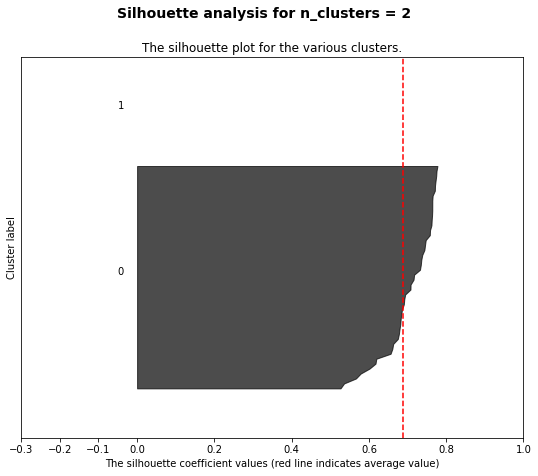

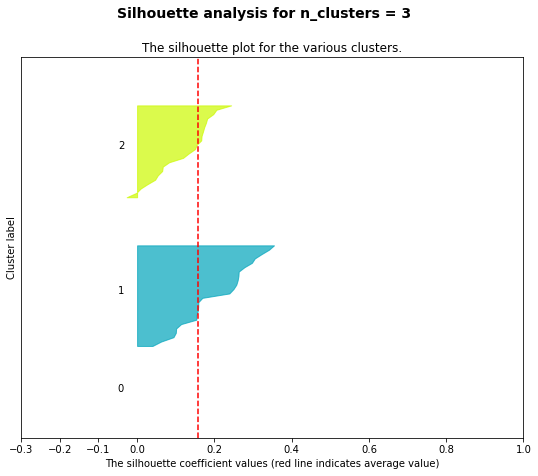

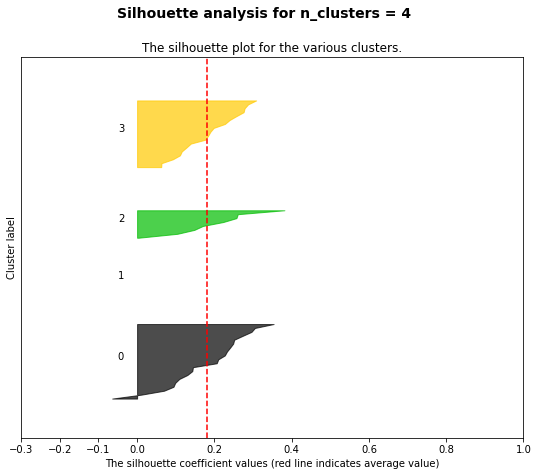

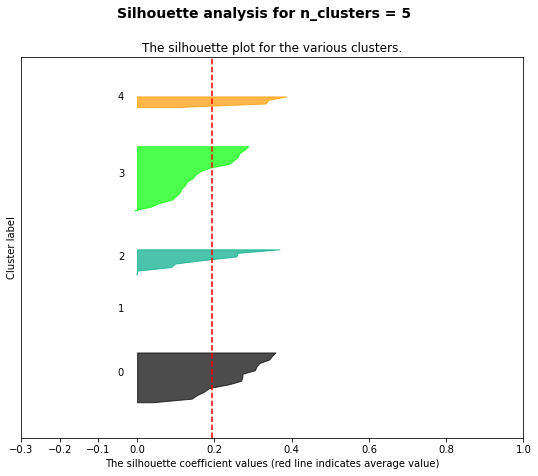

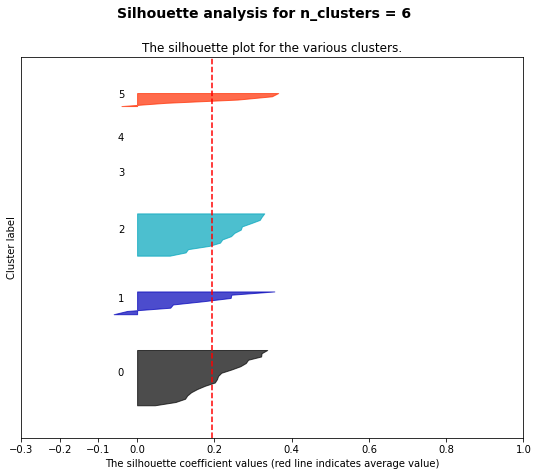

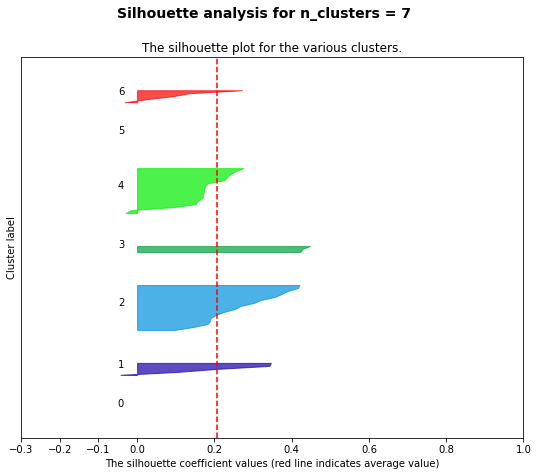

In [54]:
# Plot silhouette score
range_n_clusters = [2,3,4,5,6,7]
silhouette_plot(range_n_clusters, df_poor)

<i>The 'invisible' clusters are clusters with only one element (possibly the sample that seems to be an outlier on a plot in section 7.1).</i>

Taking into consideration what size new clusters should be and looking at plots above, 4 to 5 clusters seems to be a good choice.

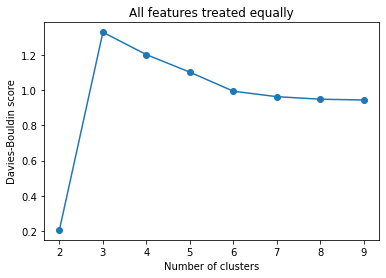

In [55]:
# Get and plot Davies-Bouldin score
DBS_results = []
for n_clusters in range(2,10):
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(df_poor) # Keep random state=0
    labels = km.labels_
    DBS_results.append(davies_bouldin_score(df_poor, labels))

plt.plot(range(2, 10), DBS_results, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('All features treated equally')
plt.show()

We do not get a clear answer how many clusters would be optimal in this case. We have to keep in mind that even if scores above are better for bigger numbers of clusters, choosing them would result in huge fragmentation (very small clusters) which might not give useful results.

Let us look at several clusterizations on a plot we used before.

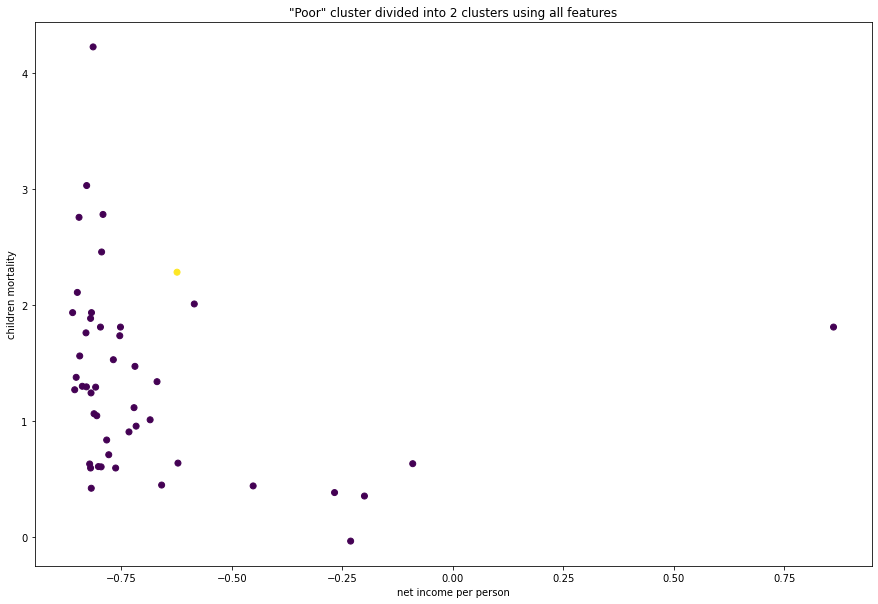

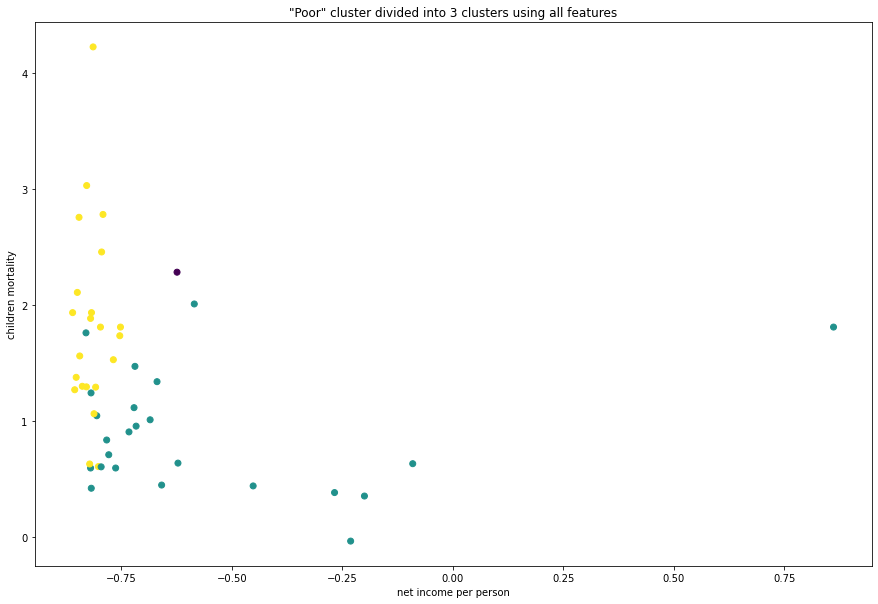

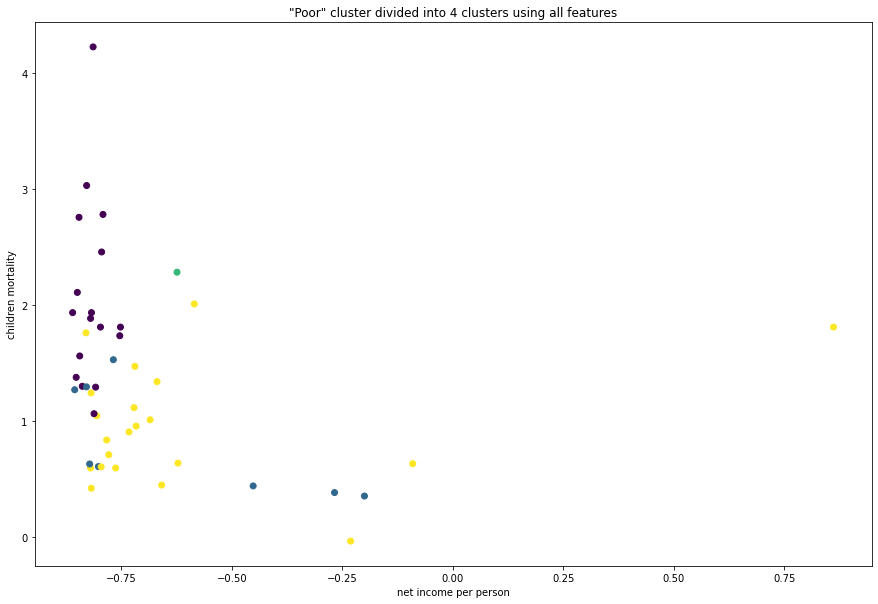

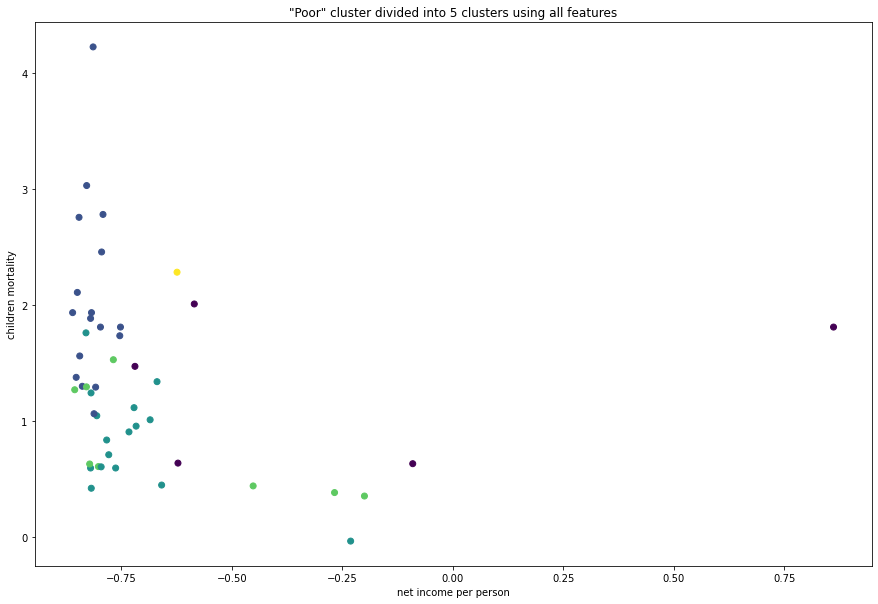

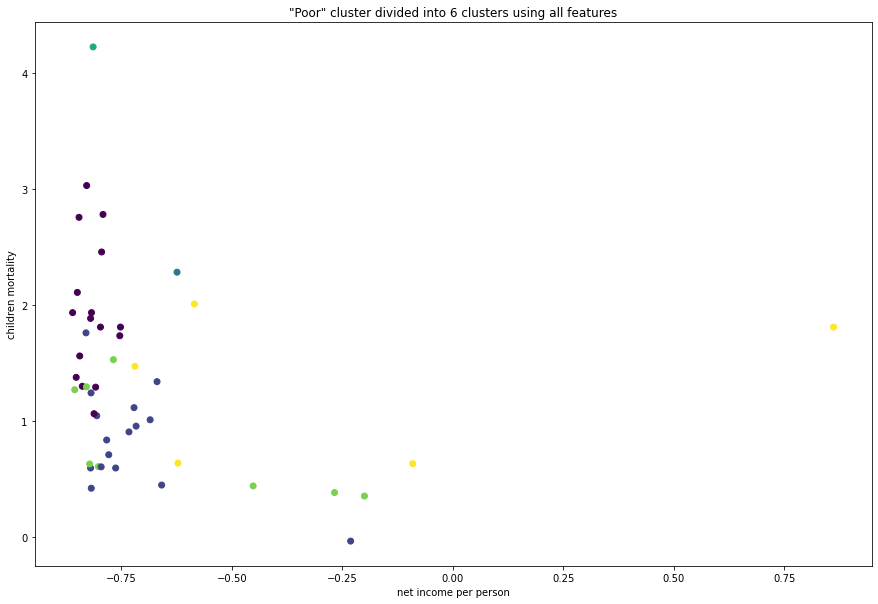

In [56]:
for i in [2,3,4,5,6]:
    km = KMeans(n_clusters=i, random_state=0).fit(df_poor)
    labels = km.labels_
    df_poor['cluster'] = labels
    plt.figure(figsize=(15,10))
    plt.scatter(df_poor['income'], df_poor['child_mort'], c=df_poor['cluster'])
    plt.title('"Poor" cluster divided into {} clusters using all features'.format(i))
    plt.xlabel('net income per person')
    plt.ylabel('children mortality')
    plt.show()

**Conclusions**



- For 6 clusters it is already too hard to rate quality of clustering.
- For 2 clusters we do not get any useful result. Clusters we got are overlapping in a way that prevents us from choosing one of them as the final group.
- For 3 clusters results are not a lot better than for two. Actually, we virtually got only 2 clusters (1 has only one sample) and the problem remains.
- For 4 and 5 clusters the results are the most promising. They differ only in one more one-sample cluster so clustering is almost the same. The results are 'promising', meaning that we can distinguish one cluster (purple/blue on 4/5-cluster plot) that might be suitable for excluding from final aid group.

Although the above results might prove useful (concentrating on clusters closest to top left corner), <u>in general this method does not seem to be suitable for final stage of analysis because the divisions are too unclear</u>.


#### <a id='722'>7.2.2 Using chosen features</a>

In this section I will just repeat steps from section 7.2.1 but with data limited to features assumed to be most influential in terms of being suitable for granting aid. These features are, as stated before, income per person and children mortality.

In [57]:
# Create dataframes basing on those created in a previous section and remove all features but two chosen
df_poor_chosen_features = df.loc[df['cluster']==1].copy()
df_poor_chosen_features.drop(['cluster', 'exports', 'gdpp', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis=1, inplace=True)
dataset_poor_chosen_features = dataset_standarized.loc[dataset_standarized['cluster']==1].copy()
dataset_poor_chosen_features.drop(['cluster', 'exports', 'gdpp', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis=1, inplace=True)

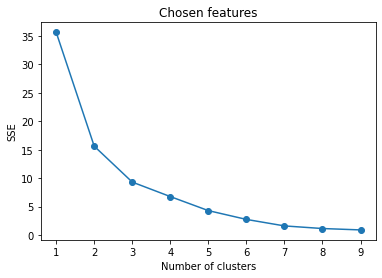

In [58]:
# Calculate SSE for numbers of clusters

sse = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i,   
        random_state=0  
    )                   
    
    km.fit(df_poor_chosen_features)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Chosen features')
plt.show()

This time it seems that the 'elbow' is present for 3 clusters.

For n_clusters = 2 The average silhouette_score is : 0.5276100495734832
For n_clusters = 3 The average silhouette_score is : 0.49561763915256823
For n_clusters = 4 The average silhouette_score is : 0.4698025321347173
For n_clusters = 5 The average silhouette_score is : 0.4947099641023409


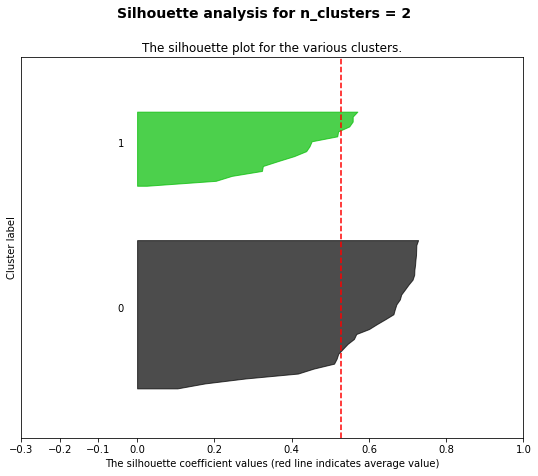

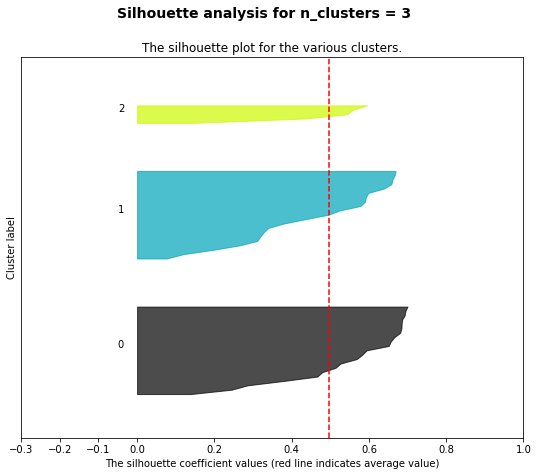

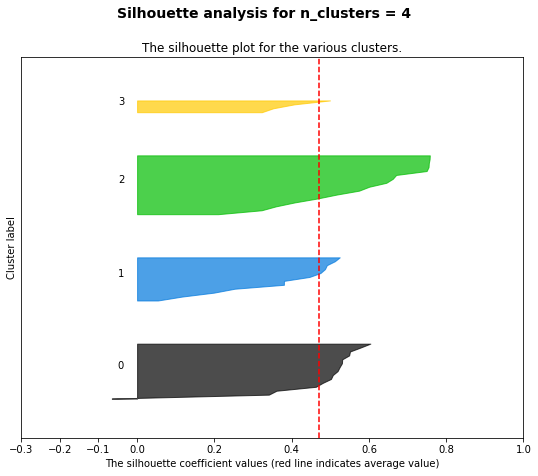

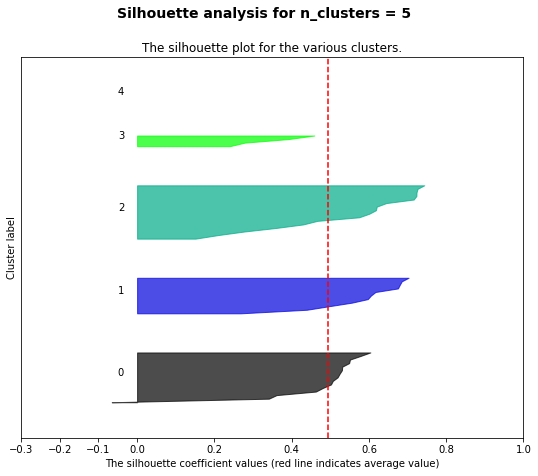

In [59]:
# Plot silhouette score
range_n_clusters = [2,3,4,5]
silhouette_plot(range_n_clusters, df_poor_chosen_features)

Numbers of clusters between 2 and 4 should be considered.

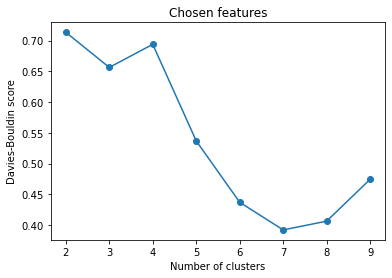

In [60]:
# Get and plot Davies-Bouldin score
DBS_results = []
for n_clusters in range(2,10):
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(df_poor_chosen_features) # Keep random state=0
    labels = km.labels_
    DBS_results.append(davies_bouldin_score(df_poor_chosen_features, labels))

plt.plot(range(2, 10), DBS_results, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Chosen features')
plt.show()

It looks like (considering previous measures) 3 clusters is a best choice. For 4 overlapping is bigger than for 3. 

Let us visualize how the divisions look like on plots.

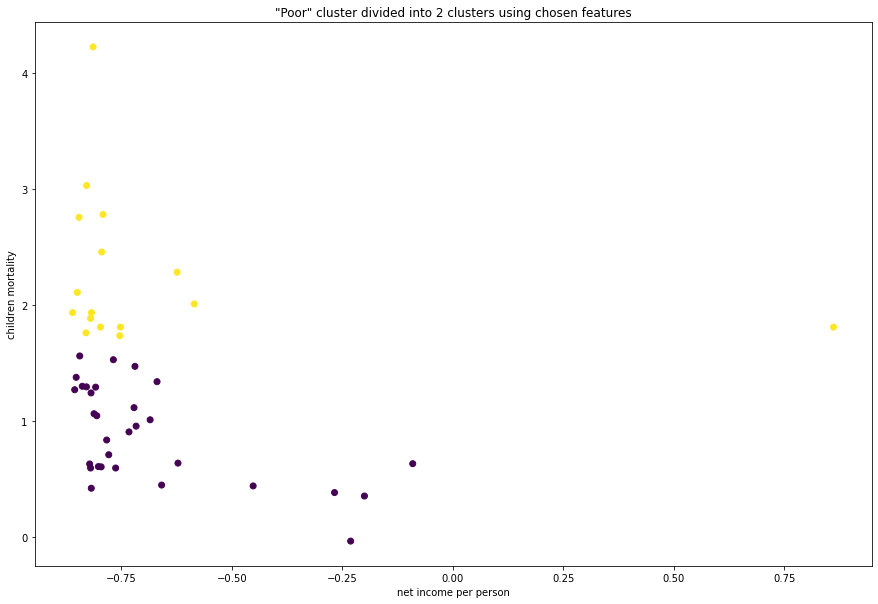

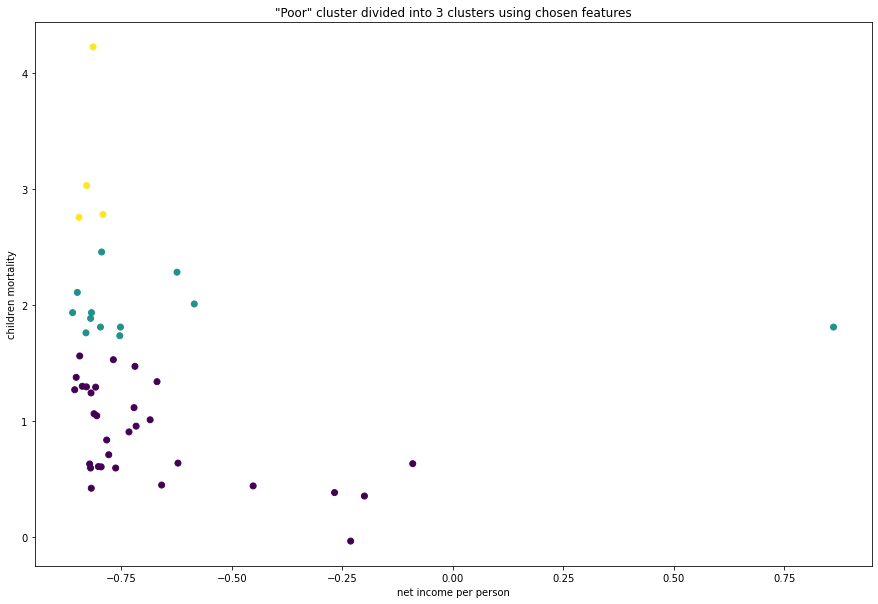

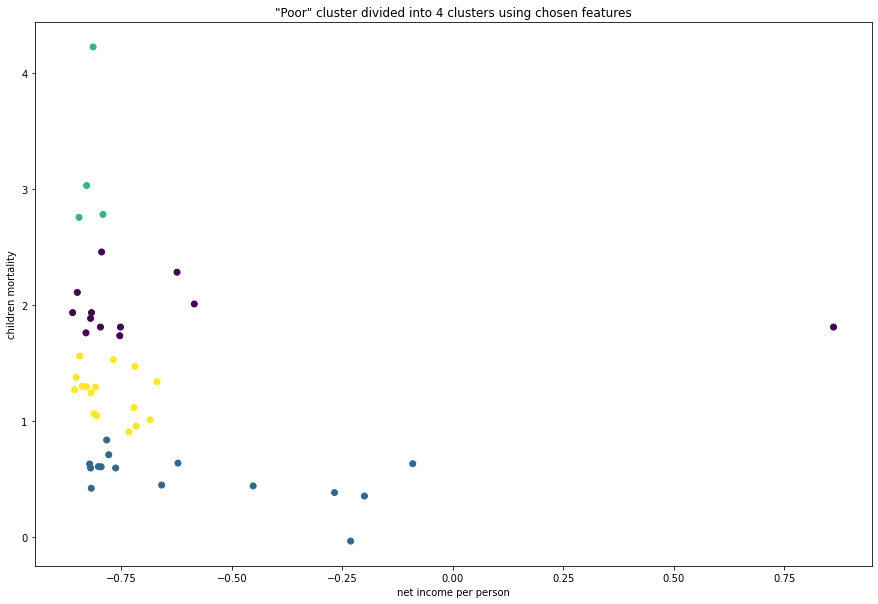

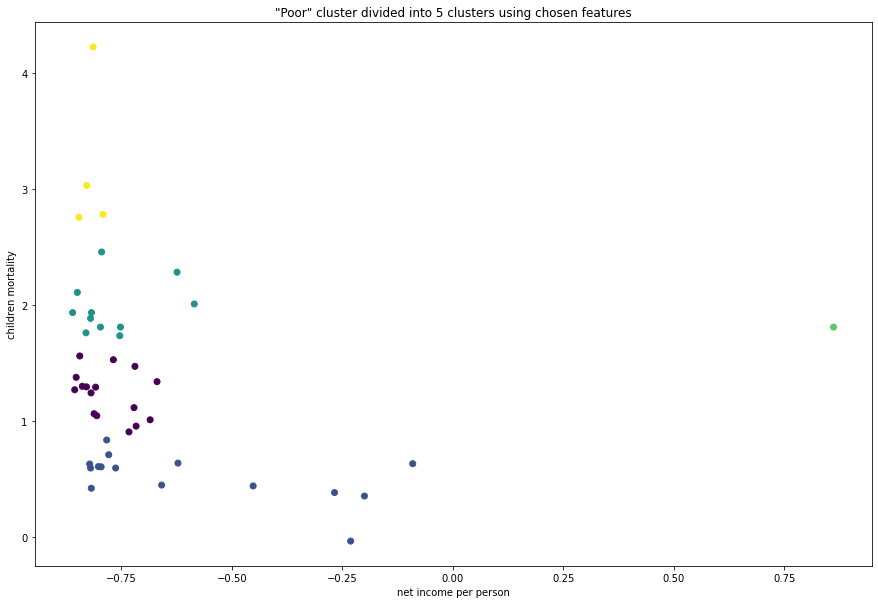

In [61]:
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, random_state=0).fit(df_poor_chosen_features)
    labels = km.labels_
    df_poor_chosen_features['cluster'] = labels
    plt.figure(figsize=(15,10))
    plt.scatter(df_poor_chosen_features['income'], df_poor_chosen_features['child_mort'], c=df_poor_chosen_features['cluster'])
    plt.title('"Poor" cluster divided into {} clusters using chosen features'.format(i))
    plt.xlabel('net income per person')
    plt.ylabel('children mortality')
    plt.show()

Apparently clustering works pretty well (the task indeed is simple) and it is up to us (or depends on how many countries we want to aid) to choose the number of clusters.

Choosing two clusters closest to top left corner in case of 4 clusters (or three clusters for case with 5 clusters - it is actually the same) seems to be reasonable.

#### <a id='723'>7.2.3 Using all features with partial PCA</a>

The last approach to this problem will be based on simultaneously using:
- net income per person and children mortality unchanged,
- other features reduced using PCA.

This way we will emphasize the crucial role of two chosen features (with less features distance-based algorithm as k-means, existing features should be more influential) but not getting rid of influence of other features. 

In order to do this let us create appropriate dataframes first.

In [62]:
# Create dataframe containing only less important features to perform PCA on it
df_poor_other_features = df.loc[df['cluster']==1].copy()
df_poor_other_features.drop(['cluster', 'income', 'child_mort'], axis=1, inplace=True)

Now let us perform PCA

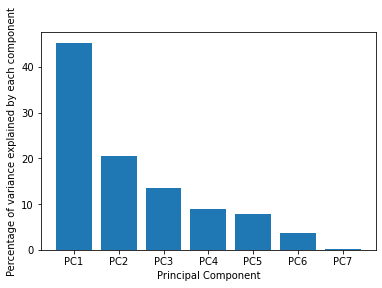

In [63]:
# Fit and transform PCA
pca = PCA()
dataset_pca = pca.fit_transform(df_poor_other_features)

# Get percentage variation and labels for plotting in next step 
pca_var = pca.explained_variance_ratio_*100
labels = ['PC' + str(x) for x in range (1, len(pca_var)+1)]

# Plot variance for each principal component (PC)
plt.bar(labels, pca_var)
plt.ylabel('Percentage of variance explained by each component')
plt.xlabel('Principal Component')
plt.show()

Two first components explain about 65% of variance. Let us go on with 3 components explaining about 80%.

This time I will skip calculating and plotting sse, DB index and silhouette score. They do not prove useful and with dataset this small it is much better to estimate clustering quality basing on clustering visualization.

In [64]:
# Creating dataframe with two most important features
df_poor_chosen_features_pca = df.loc[df['cluster']==1].copy()
df_poor_chosen_features_pca.drop(['cluster', 'exports', 'gdpp', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis=1, inplace=True)

In [65]:
# Creating proncipal components dataframe and dropping unwanted components
df_poor_other_features_pca = pd.DataFrame(dataset_pca, columns = labels, index = df_poor_chosen_features_pca.index)
df_poor_other_features_pca.drop(['PC4','PC5','PC6','PC7'], axis=1, inplace=True)

In [66]:
# Merging both dataframes
df_poor_partial_pca = pd.concat([df_poor_chosen_features_pca,df_poor_other_features_pca], axis=1)

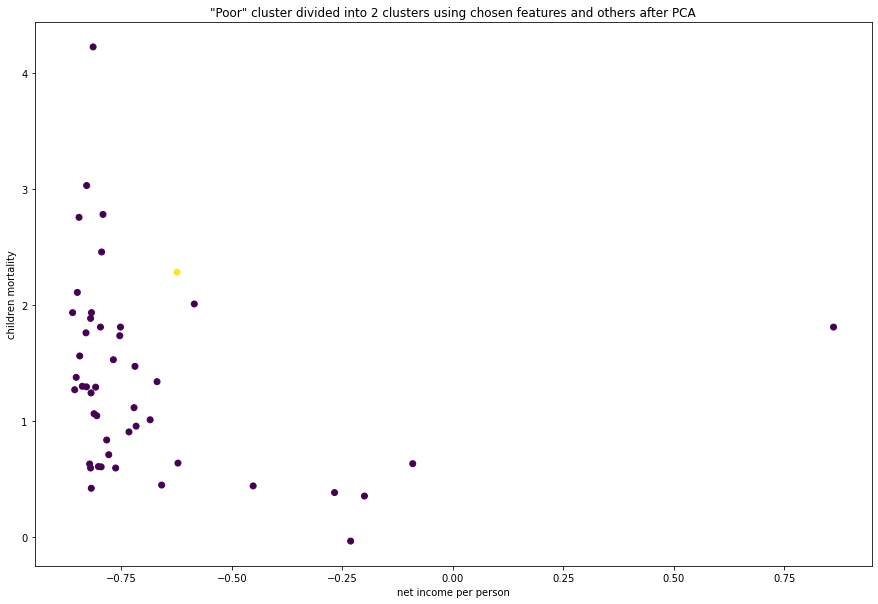

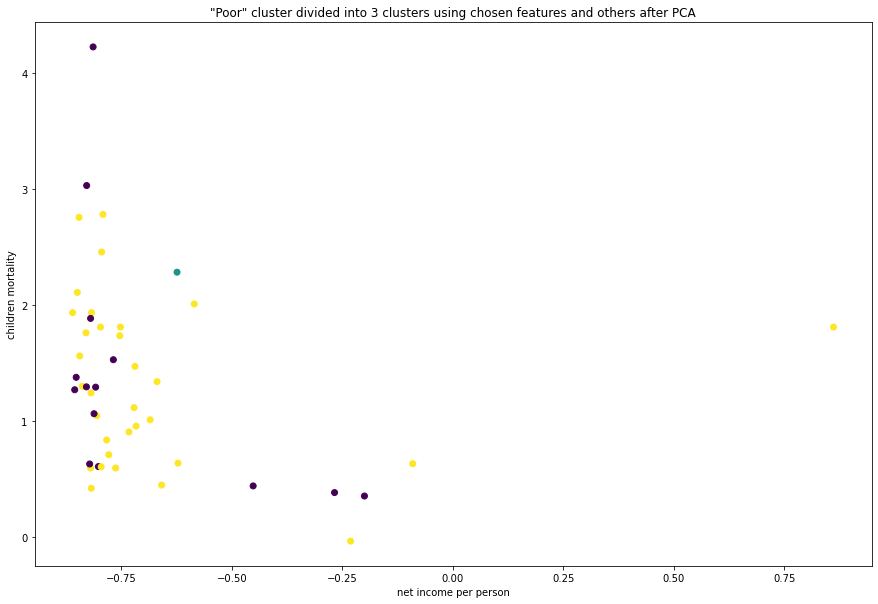

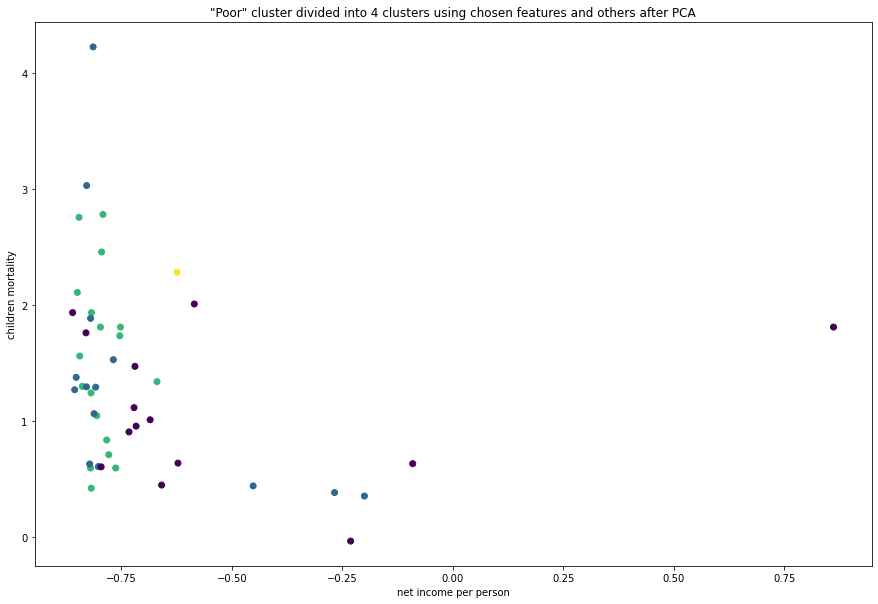

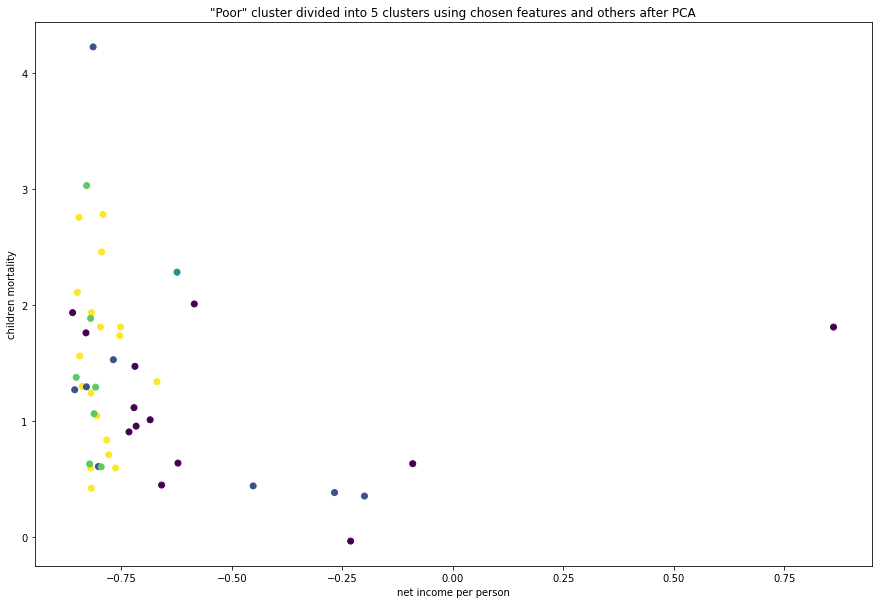

In [67]:
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, random_state=0).fit(df_poor_partial_pca)
    labels = km.labels_
    df_poor_partial_pca['cluster'] = labels
    plt.figure(figsize=(15,10))
    plt.scatter(df_poor_partial_pca['income'], df_poor_partial_pca['child_mort'], c=df_poor_partial_pca['cluster'])
    plt.title('"Poor" cluster divided into {} clusters using chosen features and others after PCA'.format(i))
    plt.xlabel('net income per person')
    plt.ylabel('children mortality')
    plt.show()

Once again clusters overlap way too much and clusters we got in this approach are not helpful. Choosing only part of those created (for given cluster numbers) leads to 'losing' too many important samples - with low income or very high mortality.

**Conclusions**

Approach with using all features and the last, experimental one, with combining principal components and unchanged features did not work well.

It seems that if we are still to use clustering in the final stage of selecting countries for aid we should focus on specific features that are more important than others.

### <a id='73'>7.3 Listing chosen countries</a>

After deciding which approach is the best one it would be suitable to look at final list of selected countries.

Of course <u>it has to be reminded that selection like this is quite naive and should be confirmed by specialists, optimally using more data</u>.

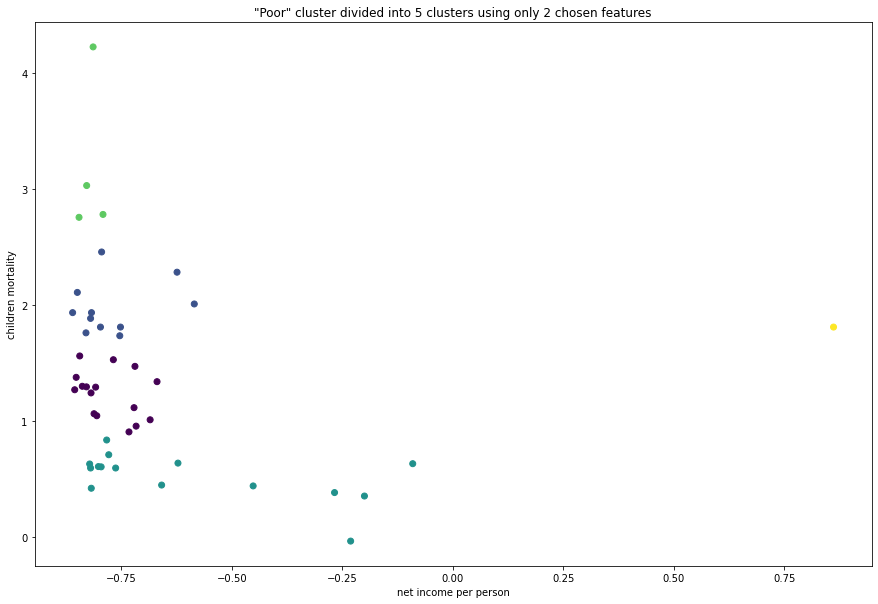

In [68]:
# Let us look once again at the plot for 5 clusters

km = KMeans(n_clusters=5, random_state=0).fit(df_poor_chosen_features)
labels = km.labels_
df_poor_chosen_features['cluster'] = labels
plt.figure(figsize=(15,10))
plt.scatter(df_poor_chosen_features['income'], df_poor_chosen_features['child_mort'], c=df_poor_chosen_features['cluster'])
plt.title('"Poor" cluster divided into {} clusters using only 2 chosen features'.format(i))
plt.xlabel('net income per person')
plt.ylabel('children mortality')
plt.show()

<u>Division for 5 clusters will be chosen. Three clusters (closest to top left corner) will be selected for granting aid.</u>

It is because it allows us to keep clear division of countries with the emphazis on children mortality and, unlike in divison for 4 clusters, excludes one outlier with highest income. We do not want this outlier in aid group because although the country has high mortality rate, it seems the problem would not be solved by money.

In [69]:
# Get number of countries in each cluster
df_poor_chosen_features.cluster.value_counts()

0    16
2    15
1    11
3     4
4     1
Name: cluster, dtype: int64

In [70]:
# Create a table with mean values for clusters
pd.pivot_table(df_poor_chosen_features, index=['cluster'])

,child_mort,income
cluster,,
0,1.235262,-0.779786
1,1.973893,-0.771291
2,0.524189,-0.593645
3,3.195382,-0.819978
4,1.808842,0.861347


Obviously, looking at the table, we decided to select clusters 3, 1 and 0 (4 is one-sample cluster), what gives us 4+11+16=29 countries. In case HELP International wanted to cut on this number, cluster 0 can be not taken into consideration, limiting number of aided countries to 15. Of course, if HELP International wants to adjust aid size basing on needs, countries from cluster 3 should receive bigger funds.

Finally, the list of selected countries is:

In [71]:
# Average countries - cluster 2
dataset_poor_chosen_features['cluster'] = labels
print("Countries recommended for aid (long list): ", list(dataset_poor_chosen_features.loc[(dataset_poor_chosen_features['cluster'] == 3) 
                            | (dataset_poor_chosen_features['cluster'] == 1) | (dataset_poor_chosen_features['cluster'] == 0)].country))
print("Countries recommended for aid (short list): ", list(dataset_poor_chosen_features.loc[(dataset_poor_chosen_features['cluster'] == 3) 
                            | (dataset_poor_chosen_features['cluster'] == 1)].country))

Countries recommended for aid (long list):  ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lao', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Sierra Leone', 'Sudan', 'Togo', 'Uganda', 'Zambia']
Countries recommended for aid (short list):  ['Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti', 'Mali', 'Niger', 'Nigeria', 'Sierra Leone']


## <a id='8'>8. Final conclusions</a>

**Task solution**

Taking into consideration how imperfect the countries selection basing only on clustering is, the recommendation for HELP International would be to treat the first clustering as an idication for further specialized selection. This indicative group consists of:

- Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

However, it we were to utilise only clustering for forming final list of countries (<u>in reality further research is still needed</u>), the list would consist of 15 or 29 countries, depending on HELP International aid capabilities:

- 15 countries: Angola, Benin, Burkina Faso, Cameroon, Central African Republic, Chad, Congo, Dem. Rep., Cote d'Ivoire, Guinea, Guinea-Bissau, Haiti, Mali, Niger, Nigeria, Sierra Leone

- 14 additional countries: Afghanistan, Burundi, Comoros, Gambia, Ghana, Lao, Lesotho, Liberia, Malawi, Mauritania, Mozambique, Pakistan, Sudan, Togo, Uganda, Zambia

In the task we assumed no other data would be used, HELP International gave us the data that they wanted to be influential in countries selection and (in the last part) that children mortality and net income per person are the most important features.